<a href="https://colab.research.google.com/github/Rajat-Sri/Capstone-3-Cardiovascular-Risk-Prediction/blob/main/Cardiovascular_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **Cardiovascular Risk Prediction**



##### **Project Type**    - Supervised Machine Learning(Classification Problem)
##### **Contribution**    - Individual
##### **Team Member**     - Rajat Srivastava

# **Project Summary -**

**Busines problem** - We have been provided dataset with the goal of creating a classification model to predict whether the patient has a 10-year risk of future coronary heart disease (CHD) or not.

**Data Wrangling** -  It is the process of transforming and mapping data from one raw data form into desired format to make it more appropriate and valuable for our analytics. The goal of data wrangling is to assure quality and useful data.

We will perform some basic data cleaning like removing null values and duplicates.

**Data Analysis and Visualization**

**Objective** - We are trying to find how other facorts are influencing the chances of getting affected by coronary heart diseases in next 10 years.

1. Count of people who are at risk of coronary heart disease.
2. Does gender playes any role in increasing risk of coronary heart diseses?
3. Ratio of men to women who are smoking.
4. Does smoking directly causes coronary hear diseses? 
5. Affect of smoking cigarette.
6. Affect of BMI over coronary heart disese. 
7. Affect of sugar levels over coronary heart disese.
8. Affect of diabetes over coronary heart disese
9. Affect of heart stroke over coronary heart disese.
10. Does high blood pressure causes heart stroke.
11. Relation between high blood pressure and hypertension.  
12. Affect of hypertension over coronary heart disese.
13. Affect of BP meds over coronary heart disese. 
14. Checking for multicollinearity between independent features using correlation heatmap
15. Pair Plot visualization

**Analysis Insights**
- Count of people with risk of coronary heart disease in next 10 years is 511 which makes 15% of the total dataset.
- Ratio of men prone to coronary heart disese is higher compared to women.
- Percentage of men who are smokers is comparetevely higher than women.
- There is 4% higher chance of getting infected by coronary diseases if a person is a smoker.
- Quantity of smoking is certainly directly related to coronary heart disese.
- Poor BMI ratio is directly affecting heath of patience.
- It is notable here that patients with high sugar levels are more prone to coronary heart diseases.
- Around 40% of people who have sugar have some type of coronary heart diseases.
- Chance of getting some kind of coronary heart disease increases by 23% if a patient is diabetic.
- Around 50% of patients already suffered heart stroke are affected by colonary hear diseases
- Chance of getting some kind of coronary heart disease increases by 31% if a patient has suffered a heart stroke.
- Normal high side of blood pressure in around 120mm Hg,and we can clearly see patients having blood pressure over this range have got heart stroke.
- Patients who have high blood pressure suffer from hypertension.
- Around 23% of patients have some kind of coronary heart disease who are suffering from hypertension.
- Chance of getting some kind of coronary heart disease increases by 12% if a patient has hypertension.
- Bp medicines are not affective in preventing coronary heart diseases.
- Chance of getting some kind of coronary heart disease increases by 19% if a patient is already taking bp meds.
 

**Hypothesis Testing**
 - Hypothetical Statement - 1
     - Null hypothesis (H0): Data follows a normal distribution.
     - Alternate Hypothesis (H1): Data does not follow a normal distribution.

 - Hypothetical Statement - 2
     - Null hypothesis (H0): Continous Data is highly correlated
     - Alternate Hypothesis (H1): Continous Data not correlated

 - Hypothetical Statement - 3
     - Null hypothesis (H0): Categorical Data is highly correlated
     - Alternate Hypothesis (H1): Categorical Data not correlated

**Feature Engineering & Data Pre-processing**

- Handling missing values
- Feature manipulation and selection
- Handling outliers
- Categorical Encoding
- Handling imbalance
- Data Transformation
- Data Splitting
- Data Scaling
- Dimentionality Reduction

**ML Model Implementation,cross validation and hyperparameter tuning**
 - Model 1 - Logistic Regression
 - Model 2 - Random Forest
 - Model 3 - XG Boost Classifier

**Conclusion**
- If we want to completely avoid any situations where the patient has heart disease, a high recall is desired. Whereas if we want to avoid treating a patient with no heart diseases a high precision is desired.
- As both evaluation metrics are equally important,we are looking at both F1 score (conveys the balance between the precision and the recall) and False Negatives(recall) for our predictions.
- Both random forest and XG Boost models were performing well,but as random forest model was overfitting data, we have choosen XG Boost classification for our final model building.

# **GitHub Link -**

https://github.com/Rajat-Sri/Capstone-3-Cardiovascular-Risk-Prediction

# **Problem Statement**


The term “heart disease” is often used interchangeably with the term “cardiovascular disease”.Heart disease is one of the biggest causes of mortality among the population of the world. Prediction of cardiovascular disease is regarded as one of the most important subjects in the section of clinical data analysis.

There is an an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts.

Dataset provides patients information and each attribute is a potential risk factor.

We have been provided dataset with the goal of creating a classification model to predict whether the patient has a 10-year risk of future coronary heart disease (CHD) or not. 

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [102]:
#Importing libraries
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score,recall_score,f1_score,precision_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn import tree
from collections import Counter

%matplotlib inline

### Dataset Loading

In [103]:
# Load Dataset

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [104]:
# Importing the dataset

dataset = pd.read_csv('/content/drive/MyDrive/Almabetter/Capstone Projects/Capstone 3/data_cardiovascular_risk.csv')

### Dataset First View

In [105]:
# Dataset First Look

dataset.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


### Dataset Rows & Columns count

In [106]:
# Dataset Rows & Columns count

dataset.shape

(3390, 17)

### Dataset Information

In [107]:
# Dataset Info

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

#### Duplicate Values

In [108]:
# Dataset Duplicate Value Count

len(dataset[dataset.duplicated()])

0

#### Missing Values/Null Values

In [109]:
# Missing Values/Null Values Count

missing = dataset.columns[dataset.isnull().any()].tolist()

print('Missing dataset Count')
print(dataset[missing].isnull().sum().sort_values(ascending = False))
print('--'*12)
print('Missing dataset Percentage')
print(round(dataset[missing].isnull().sum().sort_values(ascending = False)/len(dataset)*100,2))

Missing dataset Count
glucose       304
education      87
BPMeds         44
totChol        38
cigsPerDay     22
BMI            14
heartRate       1
dtype: int64
------------------------
Missing dataset Percentage
glucose       8.97
education     2.57
BPMeds        1.30
totChol       1.12
cigsPerDay    0.65
BMI           0.41
heartRate     0.03
dtype: float64


<Axes: >

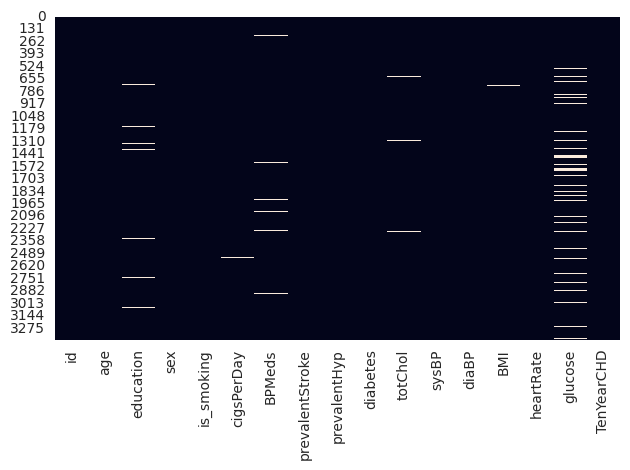

In [110]:
# Visualizing the missing values

# Checking Null Value by plotting Heatmap
sns.heatmap(dataset.isnull(), cbar=False)

### What did you know about your dataset?

- Dataset contains 3390 rows and 17 columns.
- Dataset dose not contain any duplicate values.
- Dataset contains multiple columns with missing values.
- Missing dataset Count

 - glucose   -    304
 - education  -    87
 -  BPMeds    -     44
 - totChol    -    38
 - cigsPerDay  -   22
 - BMI         -   14
 - heartRate   -    1

## ***2. Understanding Your Variables***

In [111]:
# Dataset Columns

dataset.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [112]:
# Dataset Describe

dataset.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


### Variables Description 

#### <b>Demographic:</b>
* ##### Sex: male or female("M" or "F")
* ##### Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

#### <b>Behavioral:</b>
* ##### is_smoking: whether or not the patient is a current smoker ("YES" or "NO")
* #####  Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

##### <b>Medical( history):</b>
* #####  BP Meds: whether or not the patient was on blood pressure medication (Nominal)
* #####  Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
* #####  Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
* #####  Diabetes: whether or not the patient had diabetes (Nominal)

##### <b>Medical( current):</b>
* #####  Tot Chol: total cholesterol level (Continuous)
* #####  Sys BP: systolic blood pressure (Continuous)
* #####  Dia BP: diastolic blood pressure (Continuous)
* #####  BMI: Body Mass Index (Continuous)
* #####  Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though infact discrete, yet are considered continuous because of large number of possible values.)
* #####  Glucose: glucose level (Continuous)

##### <b>Predict variable (desired target):</b>
* #####  10-year risk of coronary heart disease CHD(1- Yes, 0-No)




### Check Unique Values for each variable.

In [113]:
# Check Unique Values for each variable.

for i in dataset.columns.tolist():
  print("No. of unique values in ",i,"is",dataset[i].nunique(),".")

No. of unique values in  id is 3390 .
No. of unique values in  age is 39 .
No. of unique values in  education is 4 .
No. of unique values in  sex is 2 .
No. of unique values in  is_smoking is 2 .
No. of unique values in  cigsPerDay is 32 .
No. of unique values in  BPMeds is 2 .
No. of unique values in  prevalentStroke is 2 .
No. of unique values in  prevalentHyp is 2 .
No. of unique values in  diabetes is 2 .
No. of unique values in  totChol is 240 .
No. of unique values in  sysBP is 226 .
No. of unique values in  diaBP is 142 .
No. of unique values in  BMI is 1259 .
No. of unique values in  heartRate is 68 .
No. of unique values in  glucose is 132 .
No. of unique values in  TenYearCHD is 2 .


In [114]:
# Check Unique Values for each variable.

#creating a column list 
categorical_variables = ['education','sex','is_smoking','BPMeds','prevalentStroke','prevalentHyp','diabetes','TenYearCHD']

#checking the unique values
for col in categorical_variables:
  print(f'Unique values for {col}: {dataset[col].unique()}')

Unique values for education: [ 2.  4.  1.  3. nan]
Unique values for sex: ['F' 'M']
Unique values for is_smoking: ['YES' 'NO']
Unique values for BPMeds: [ 0. nan  1.]
Unique values for prevalentStroke: [0 1]
Unique values for prevalentHyp: [0 1]
Unique values for diabetes: [0 1]
Unique values for TenYearCHD: [1 0]


## 3. ***Data Wrangling***

### Data Wrangling Code

In [115]:
# Write your code to make your dataset analysis ready.

# Create a copy of the current dataset and assigning to df
df=dataset.copy()

In [116]:
# Dropping the id column because it will just act like indexing
df.drop(columns=['id'], inplace=True)

In [117]:
# Replacing null values with the median
for col in ['glucose','education','BPMeds','totChol','cigsPerDay','BMI','heartRate']:
  df[col] = df[col].fillna(df[col].median())

In [118]:
# Now checking Nan values
df.isna().sum()

age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [119]:
# Checking dataset
df.head(10)

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
5,61,3.0,F,NO,0.0,0.0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0,1
6,61,1.0,M,NO,0.0,0.0,0,1,0,238.0,232.0,136.0,24.83,75.0,79.0,0
7,36,4.0,M,YES,35.0,0.0,0,0,0,295.0,102.0,68.0,28.15,60.0,63.0,0
8,41,2.0,F,YES,20.0,0.0,0,0,0,220.0,126.0,78.0,20.70,86.0,79.0,0
9,55,2.0,F,NO,0.0,0.0,0,1,0,326.0,144.0,81.0,25.71,85.0,78.0,0


### What all manipulations have you done and insights you found?

**Manipulations**
 - Less than 10% overall data is missing,this is not major and can easily be handeled by replacing with median values, we used median values as it will not affect data skewness.
 - Data type format of variables are also incorrect which is corrected.

**Insights on dataset first view**

 - Healthy blood sugar level is between 100-125mg/dl.For now on analysing it is found that very few patients have high glucose levels.
 - Total chalestrol anything more than 200mg/dl is high, and from oour dataset it can concluded that most people have high chalestrol levels.
 - Healthy BMI ranges between 18.5-24.9, but most than 50% partients in dataset does not belong to thin group
 - Normal resting heart rate is between 60-100/min,very few people fall beyond this range.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

In [120]:
# Creating a copy of df for EDA
newdf = df.copy()

# Creating a copy of df for Data Modelling
ml_df = df.copy()

#### Chart - 1 - Count of people who are at risk of coronary heart disease

0    2879
1     511
Name: TenYearCHD, dtype: int64


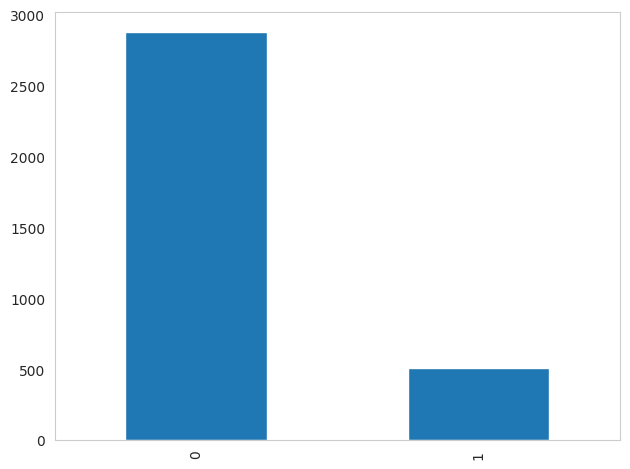

In [121]:
# Chart - 1 visualization code

#Count of each type
plot_1 = newdf['TenYearCHD'].value_counts()
print(plot_1)

#Visualizing using bar
plot_1.plot(kind='bar')
plt.show()

##### 1. Why did you pick the specific chart?

- Bar charts are one of beat ways to show segments of information. Vertical/Horizontal bar charts are useful to compare different categorical or discrete variables, such as age groups, classes, schools, etc., as long as there are not too many categories to compare.

##### 2. What is/are the insight(s) found from the chart?

- Count of people with risk of coronary heart disease in next 10 years is 511 which makes 15% of the total dataset.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

- We got to know that 15% of the total people are prone to coronary heart diseses which is a significant number in terms of heathcare sector.
- We need to find reasons why such a huge population is prone to coronary heart diseases.Let take a more indepth look at out dataset to lnow more.

#### Chart - 2 - Does gender playes any role in increasing risk of coronary heart diseses?

  sex  TenYearCHD     0
0   F           0  1684
1   F           1   239
2   M           0  1195
3   M           1   272


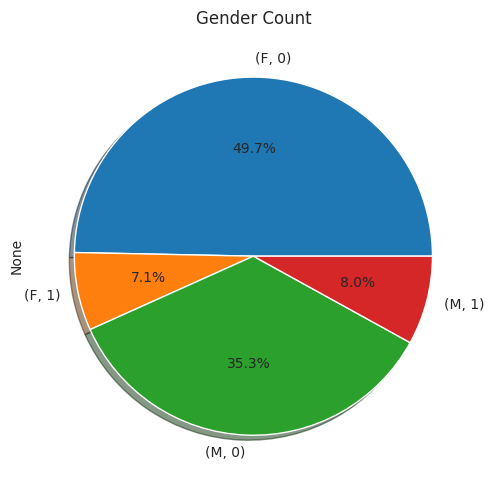

In [122]:
# Chart - 2 visualization code

# Analysing the distribution

plot_2 = newdf.groupby(['sex', 'TenYearCHD']).size().reset_index()
print(plot_2)

#Visualizing using pie chart
newdf.groupby(['sex', 'TenYearCHD']).size().plot.pie(title='Gender Count', figsize=(10,5), autopct='%1.1f%%', shadow=True)
plt.show()

##### 1. Why did you pick the specific chart?

- A pie chart helps organize and show data as a percentage of a whole, and best suited to represent such data.

##### 2. What is/are the insight(s) found from the chart?

- Ratio of men prone to coronary heart disese is higher compared to women.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

- It seems like men are leading a more unhealthy lifestyle as compared to women.
- There can be various reasons for that like poor diet or smoking.We need to dig deep in that.

#### Chart - 3 - Ratio of men to women who are smoking.

sex  is_smoking
F    NO            1147
     YES            776
M    NO             556
     YES            911
dtype: int64


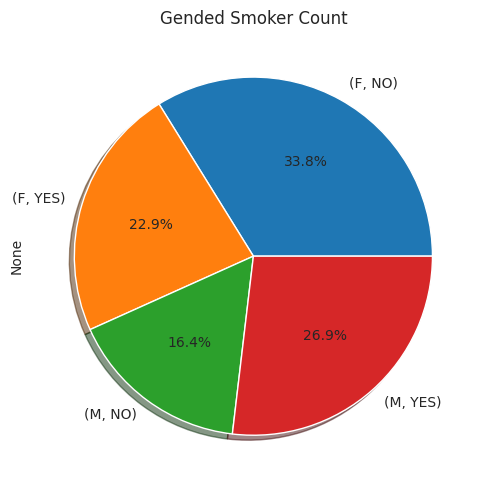

In [123]:
# Chart - 3 visualization code

# Analysing the distribution

plot_3 = newdf.groupby(['sex', 'is_smoking']).size()
print(plot_3)

#Visualizing using pie chart
plot_3.plot.pie(title='Gended Smoker Count', figsize=(10,5), autopct='%1.1f%%', shadow=True)
plt.show()

##### 1. Why did you pick the specific chart?

- A pie chart helps organize and show data as a percentage of a whole, and best suited to represent such data.

##### 2. What is/are the insight(s) found from the chart?

- It is quite clear that percentage of men who are smokers is comparetevely higher than women.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

- Though we can clearly see that as men are more prone to coronary heart diseases as they are more addicted to smoking compared to women.
- But we also need to check that is smoking is directly the cause of coronary hear diseases? 

#### Chart - 4 - Does smoking directly causes coronary hear diseses?

TenYearCHD  is_smoking
0           NO            1467
            YES           1412
1           NO             236
            YES            275
dtype: int64


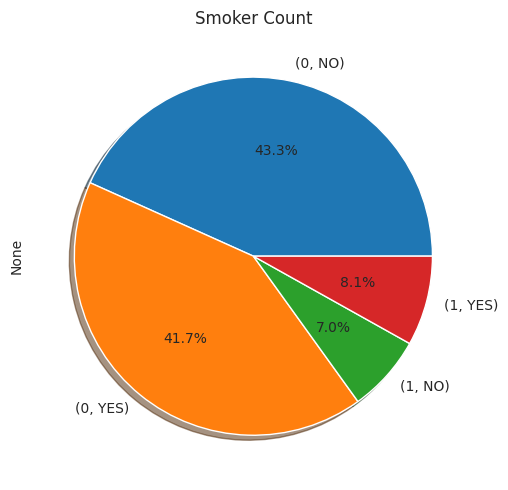

In [124]:
# Chart - 4 visualization code

# Analysing the distribution

plot_4 = newdf.groupby(['TenYearCHD', 'is_smoking']).size()
print(plot_4)

#Visualizing using pie chart
plot_4.plot.pie(title='Smoker Count', figsize=(10,5), autopct='%1.1f%%', shadow=True)
plt.show()

##### 1. Why did you pick the specific chart?

- A pie chart helps organize and show data as a percentage of a whole, and best suited to represent such data.

##### 2. What is/are the insight(s) found from the chart?

- There is 4% higher chance of getting infected by coronary diseases if a person is a smoker.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

- Though ratio of men infected with coronary heart diseses is higher and they even smoke more comapred to women,but then also we were unable to find any major direct relation between heart diseses and smoking.
- It seem smoking alone can't be the factor,it may be one of the adding factors.
Lets try to take in account other factors like amont of smoking per day as well.

#### Chart - 5 - Affect of smoking cigarette

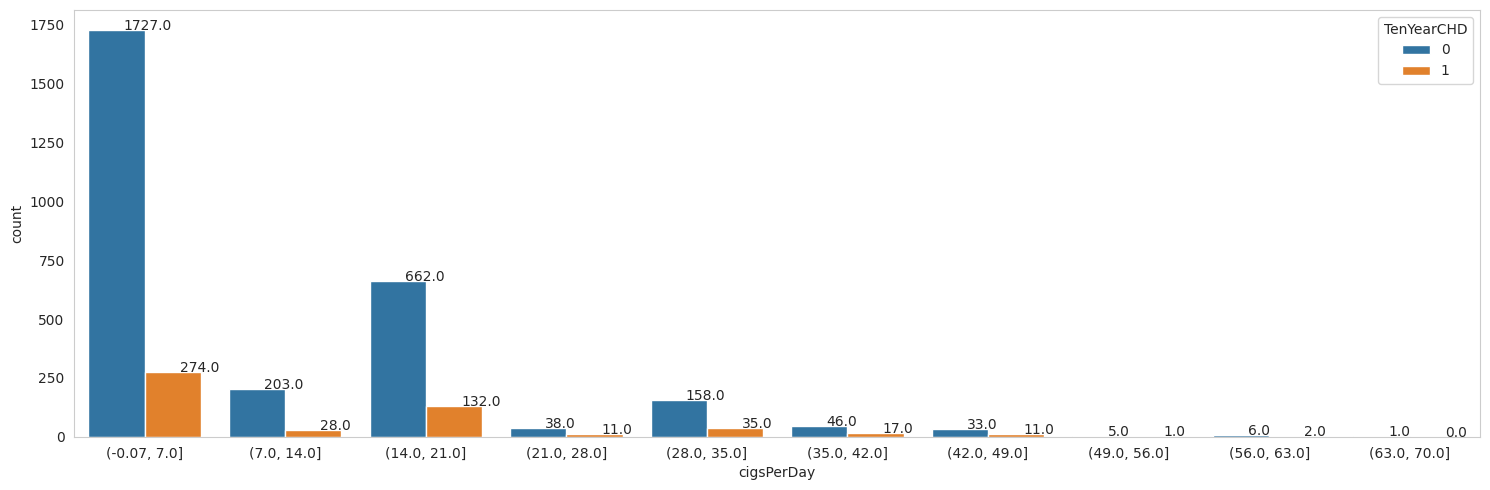

In [125]:
# Chart - 5 visualization code
# Analysing the dataset

f, plot_5 = plt.subplots(figsize=(15, 5))
plt.rcParams["figure.autolayout"] = True

plot_5 = sns.countplot(data=newdf, x=pd.cut(newdf['cigsPerDay'], 10), hue='TenYearCHD')

for p in plot_5.patches:
   plot_5.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()

##### 1. Why did you pick the specific chart?

- Bar charts are one of beat ways to show segments of information. Vertical/Horizontal bar charts are useful to compare different categorical or discrete variables, such as age groups, classes, schools, etc., as long as there are not too many categories to compare.

##### 2. What is/are the insight(s) found from the chart?

- Quantity of smoking is certainly directly related to coronary heart disese. 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

- Though we had not found any direct relation of smoking with coronary heart disese,but quantity of smoaking certainly influences the increases chances of having coronary heart disease.

#### Chart - 6 - Affect of BMI over coronary heart disese.

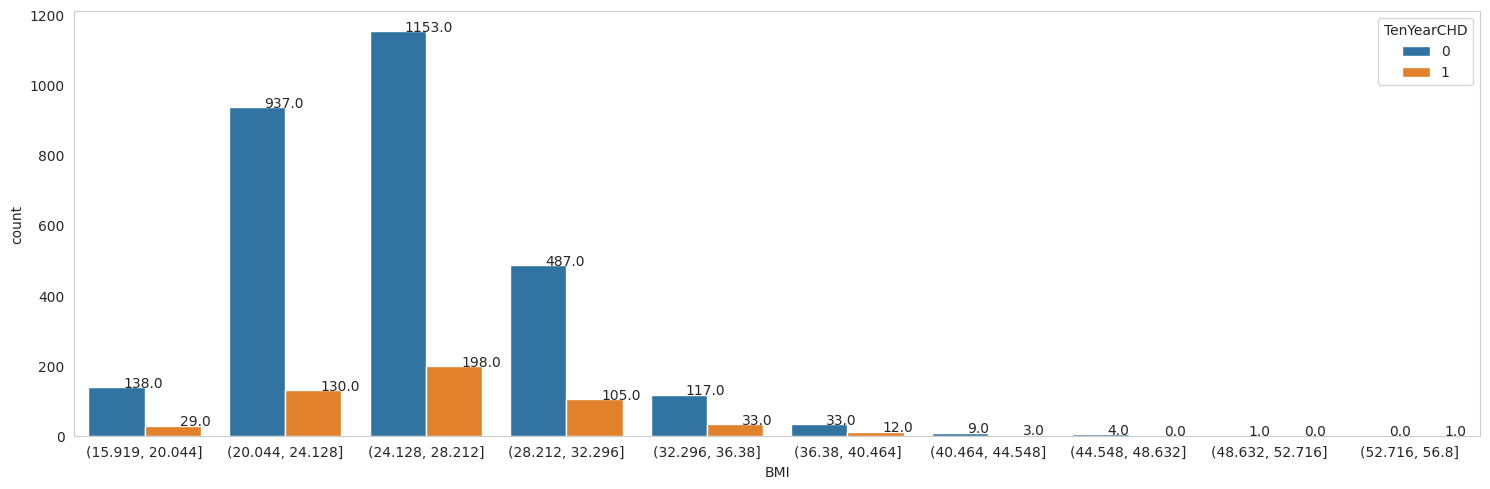

In [126]:
# Chart - 6 visualization code

# Analysing the  dataset

f, plot_6 = plt.subplots(figsize=(15, 5))
plt.rcParams["figure.autolayout"] = True

plot_6 = sns.countplot(data=newdf, x=pd.cut(newdf['BMI'], 10), hue='TenYearCHD')

for p in plot_6.patches:
   plot_6.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()

##### 1. Why did you pick the specific chart?

- Bar charts are one of beat ways to show segments of information. Vertical/Horizontal bar charts are useful to compare different categorical or discrete variables, such as age groups, classes, schools, etc., as long as there are not too many categories to compare.

##### 2. What is/are the insight(s) found from the chart?

- Poor BMI ratio is directly affecting heath of patience

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

- Though people with poor BMI ratio are relatively higher at risk of having coronary heart diseases,but we saw that even patience with good BMI ratio are at risk.So BMI alone can't be the factore.
- Lets try to find other factors as well.

#### Chart - 7 -  Affect of sugar levels over coronary heart disese.

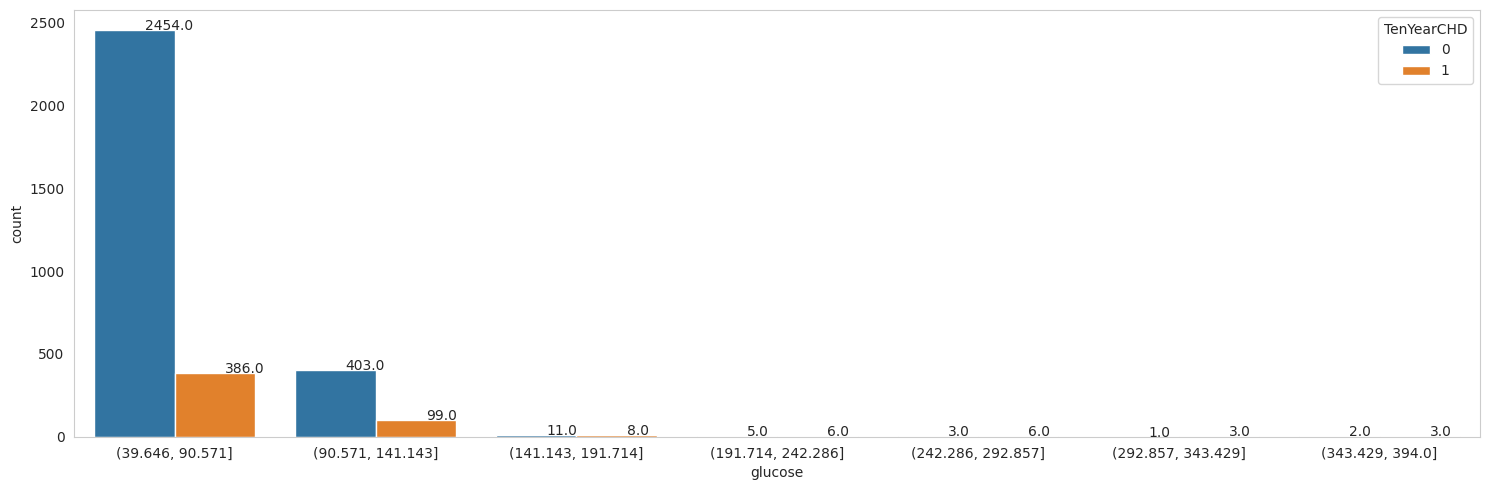

In [127]:
# Chart - 7 visualization code

# Analysing the  dataset
f, plot_7 = plt.subplots(figsize=(15, 5))
plt.rcParams["figure.autolayout"] = True

plot_7 = sns.countplot(data=newdf, x=pd.cut(newdf['glucose'], 7), hue='TenYearCHD')

for p in plot_7.patches:
   plot_7.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()

##### 1. Why did you pick the specific chart?

- Bar charts are one of beat ways to show segments of information. Vertical/Horizontal bar charts are useful to compare different categorical or discrete variables, such as age groups, classes, schools, etc., as long as there are not too many categories to compare.

##### 2. What is/are the insight(s) found from the chart?

- It is notable here that patients with high sugar levels are more prone to coronary heart diseases.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

-  If people having high sugar level are more affected by diseases,it clearly means patients having dibatese are certainly more prone to cardiovascular heart diseases.Lets find that out too.

#### Chart - 8 - Affect of diabetes



diabetes  TenYearCHD
0         0             2825
          1              478
1         0               54
          1               33
dtype: int64


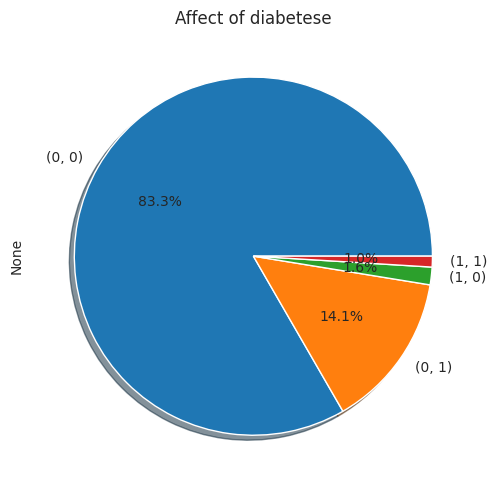

In [128]:
# Chart - 8 visualization code

#Count of each store type
plot_8 = newdf.groupby(['diabetes', 'TenYearCHD']).size()
print(plot_8)

#Visualizing using pie chart
plot_8.plot.pie(title='Affect of diabetese', figsize=(10,5), autopct='%1.1f%%', shadow=True)
plt.show()


##### 1. Why did you pick the specific chart?

- A pie chart helps organize and show data as a percentage of a whole, and best suited to represent such data.

##### 2. What is/are the insight(s) found from the chart?

- Around 40% of people who have sugar have some type of coronary heart diseases.
- Chance of getting some kind of coronary heart disease increases by 23% if a patient is diabetic.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

- Since high level of sugar causes heart diseases, and as we know high sugar causes diabetese and as we saw in previous analysis that people with diabetese are more prone to heart attacks,so its quite clear that hear attack increases the chances of coronary heart diseases in a patient.
- Lets try to find that direct relation between heart stroke and coronary heart diseases.

#### Chart - 9 - Affect of heart stroke.

prevalentStroke  TenYearCHD
0                0             2867
                 1              501
1                0               12
                 1               10
dtype: int64


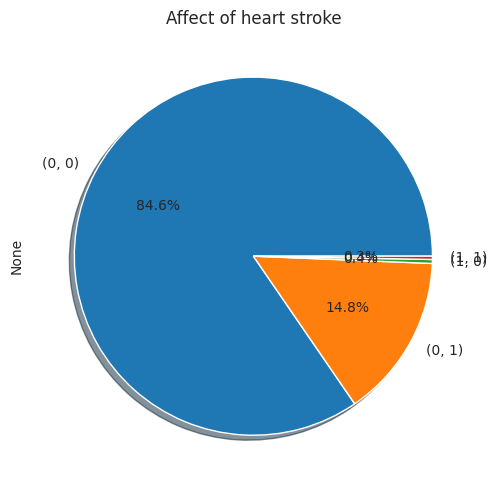

In [129]:
# Chart - 9 visualization code

#Count of each store type
plot_9 = newdf.groupby(['prevalentStroke', 'TenYearCHD']).size()
print(plot_9)

#Visualizing using pie chart
plot_9.plot.pie(title='Affect of heart stroke', figsize=(10,5), autopct='%1.1f%%', shadow=True)
plt.show()

##### 1. Why did you pick the specific chart?

- A pie chart helps organize and show data as a percentage of a whole, and best suited to represent such data.

##### 2. What is/are the insight(s) found from the chart?

- Around 50% of patients already suffered heart stroke are affected by colonary hear diseases
- Chance of getting some kind of coronary heart disease increases by 31% if a patient has suffered a heart stroke.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

- As its proven that people who have suffered heart strokes are more prone to coronary heart diseases.And its known that heart stroke is majorly caused because of high blood pressure.
- Lets try to find relation here too.

#### Chart - 10 -  Does high blood pressure causes heart stroke.

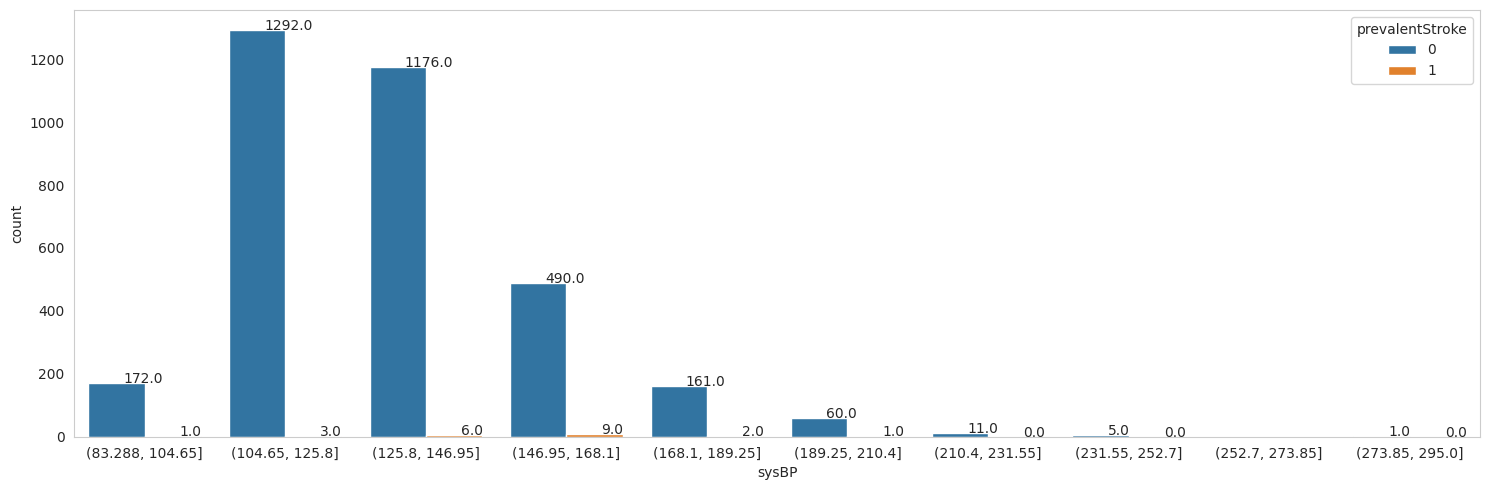

In [130]:
# Chart - 10 visualization code

# Analysing the  dataset
f, plot_10 = plt.subplots(figsize=(15, 5))
plt.rcParams["figure.autolayout"] = True

plot_10 = sns.countplot(data=newdf, x=pd.cut(newdf['sysBP'], 10), hue='prevalentStroke')

for p in plot_10.patches:
   plot_10.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()

##### 1. Why did you pick the specific chart?

- Bar charts are one of beat ways to show segments of information. Vertical/Horizontal bar charts are useful to compare different categorical or discrete variables, such as age groups, classes, schools, etc., as long as there are not too many categories to compare.

##### 2. What is/are the insight(s) found from the chart?

- Normal high side of blood pressure in around 120mm Hg,and we can clearly see patients having  blood pressure over this range have got heart stroke.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

- We can clearly say that as high blood pressure increases the chance of heart attack,and heart stroke cleary means coronary heart disease it means if a patient has high high blood pressure there is a great chance that patient is suffering from coronary heart diseases.

#### Chart - 11 - Relation between high blood pressure and hypertension

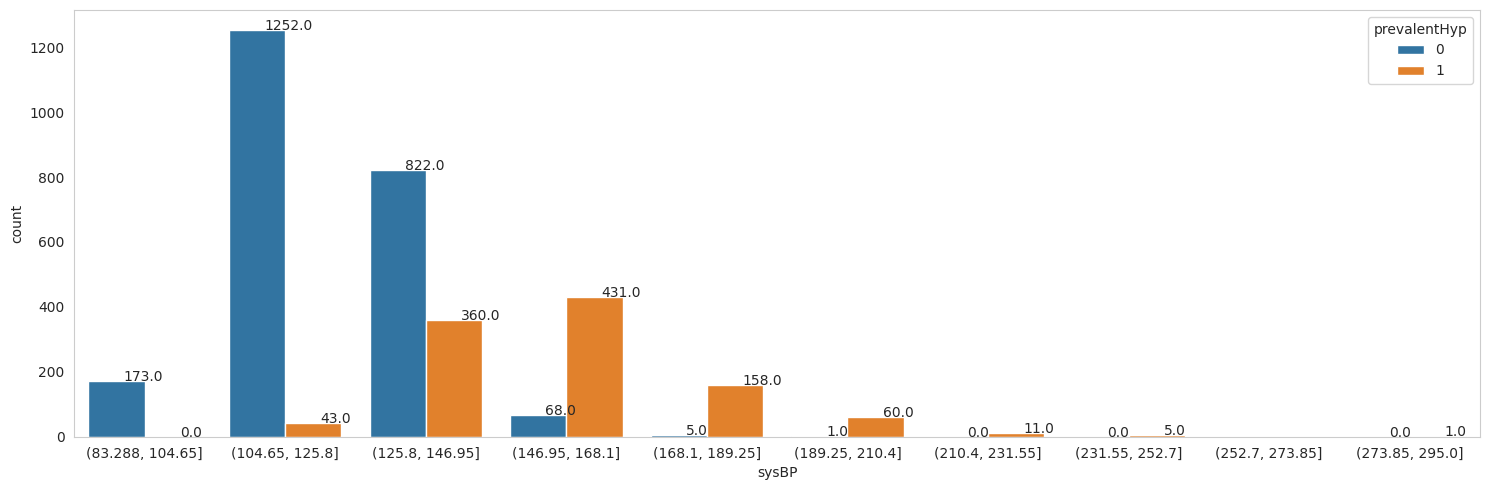

In [131]:
# Chart - 11 visualization code


f, plot_11 = plt.subplots(figsize=(15, 5))
plt.rcParams["figure.autolayout"] = True

plot_11 = sns.countplot(data=newdf, x=pd.cut(newdf['sysBP'], 10), hue='prevalentHyp')

for p in plot_11.patches:
   plot_11.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()

##### 1. Why did you pick the specific chart?

- Bar charts are one of beat ways to show segments of information. Vertical/Horizontal bar charts are useful to compare different categorical or discrete variables, such as age groups, classes, schools, etc., as long as there are not too many categories to compare.

##### 2. What is/are the insight(s) found from the chart?

- Patients who have high blood pressure suffer from hypertension.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

- We can clearly find that hypertension is the result of high blood pressure,which leads to stroke and indicates the presence of some kind of coronary heart disease.
- Lets find if hypertension causes coronary heart diseases.

#### Chart - 12 - Affect of hypertension.

prevalentHyp  TenYearCHD
0             0             2065
              1              256
1             0              814
              1              255
dtype: int64


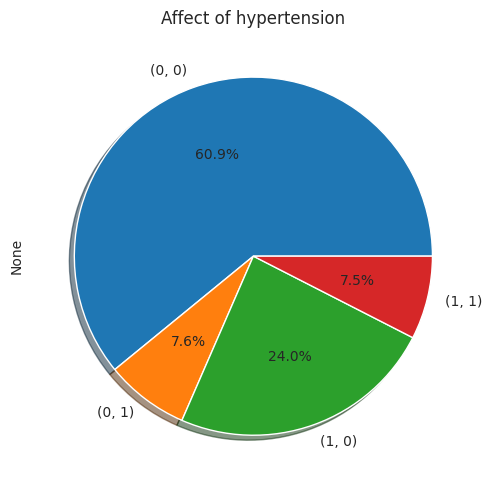

In [132]:
# Chart - 12 visualization code
# Analysing the dataset

plot_12 = newdf.groupby(['prevalentHyp', 'TenYearCHD']).size()
print(plot_12)

#Visualizing using pie chart
plot_12.plot.pie(title='Affect of hypertension', figsize=(10,5), autopct='%1.1f%%', shadow=True)
plt.show()

##### 1. Why did you pick the specific chart?

- A pie chart helps organize and show data as a percentage of a whole, and best suited to represent such data.

##### 2. What is/are the insight(s) found from the chart?

- Around 23% of patients have some kind of coronary heart disease who are suffering from hypertension.
- Chance of getting some kind of coronary heart disease increases by 12% if a patient has hypertension.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

- Hypertension clearly leads to coronary heart diseases.Does taking bp medicines decreases the chances of coronary heart diseases,lets find out.

#### Chart - 13 - Affect of BP meds.

BPMeds  TenYearCHD
0.0     0             2812
        1              478
1.0     0               67
        1               33
dtype: int64


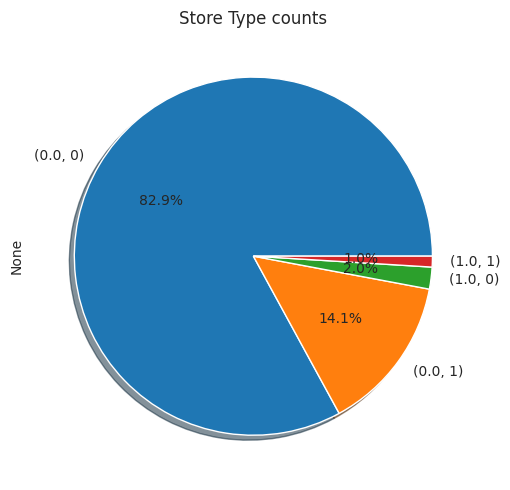

In [133]:
# Chart - 13 visualization code
# Analysing the dataset

plot_13 = newdf.groupby(['BPMeds', 'TenYearCHD']).size()
print(plot_13)

#Visualizing using pie chart
plot_13.plot.pie(title='Store Type counts', figsize=(10,5), autopct='%1.1f%%', shadow=True)
plt.show()

##### 1. Why did you pick the specific chart?

- A pie chart helps organize and show data as a percentage of a whole, and best suited to represent such data.

##### 2. What is/are the insight(s) found from the chart?

- Bp medicines are not affective in preventing coronary heart diseases.
- Chance of getting some kind of coronary heart disease increases by 19% if a patient is already taking bp meds.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

- Only living healthy life style can protect from any type of coronary heart disease.Medicines have their own very limited affect.

#### Chart - 14 - Correlation Heatmap

<Axes: >

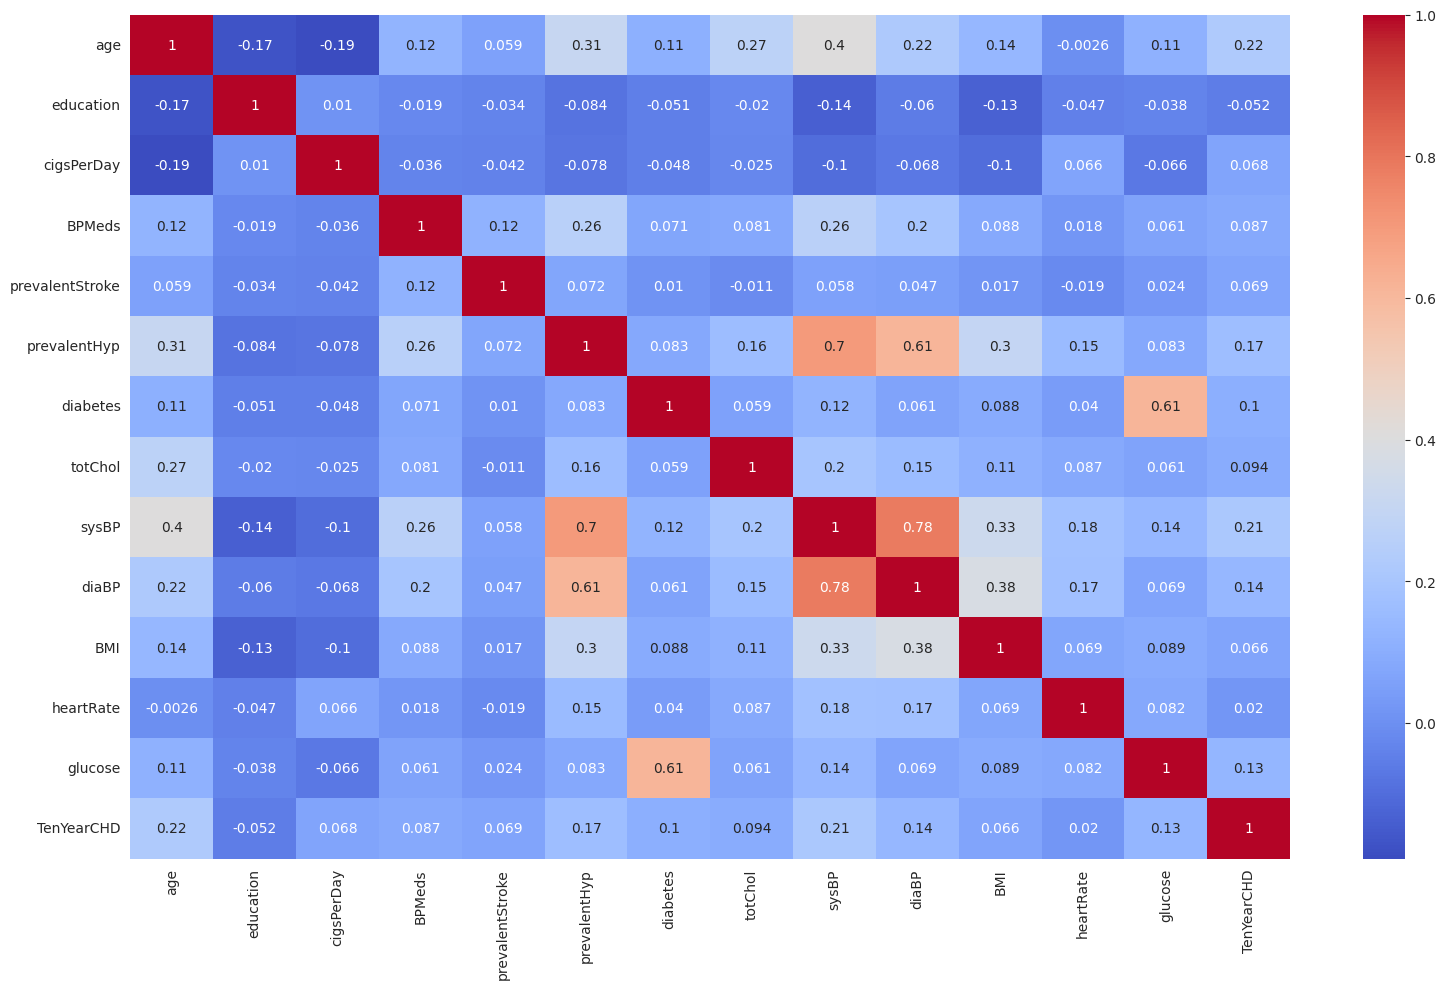

In [134]:
# Correlation Heatmap visualization code

#Checking relation between  features using correlation heatmap

plt.figure(figsize=(16,10))
sns.heatmap(newdf.corr(), cmap="coolwarm", annot=True)

##### 1. Why did you pick the specific chart?

- Correlation heatmaps is used to find potential relationships between variables and to understand the strength of these relationships. In addition, correlation plots helps to identify outliers and to detect linear and nonlinear relationships as well.

##### 2. What is/are the insight(s) found from the chart?

- None of the independent variables are showing any close relation with dependent variable 'TenYearCHD'
- 'Glucose is highly correlated with 'diabetese', which means high glucose level leads to diabetese in a patient.
- Hypertension is directly correlated with blood pressure,which means high blood pressure leads to hypertension.
- There is a lean relation between BMI and blood pressure,which means high blood pressure may be the result of high BMI of a patient.

#### Chart - 15 - Pair Plot 

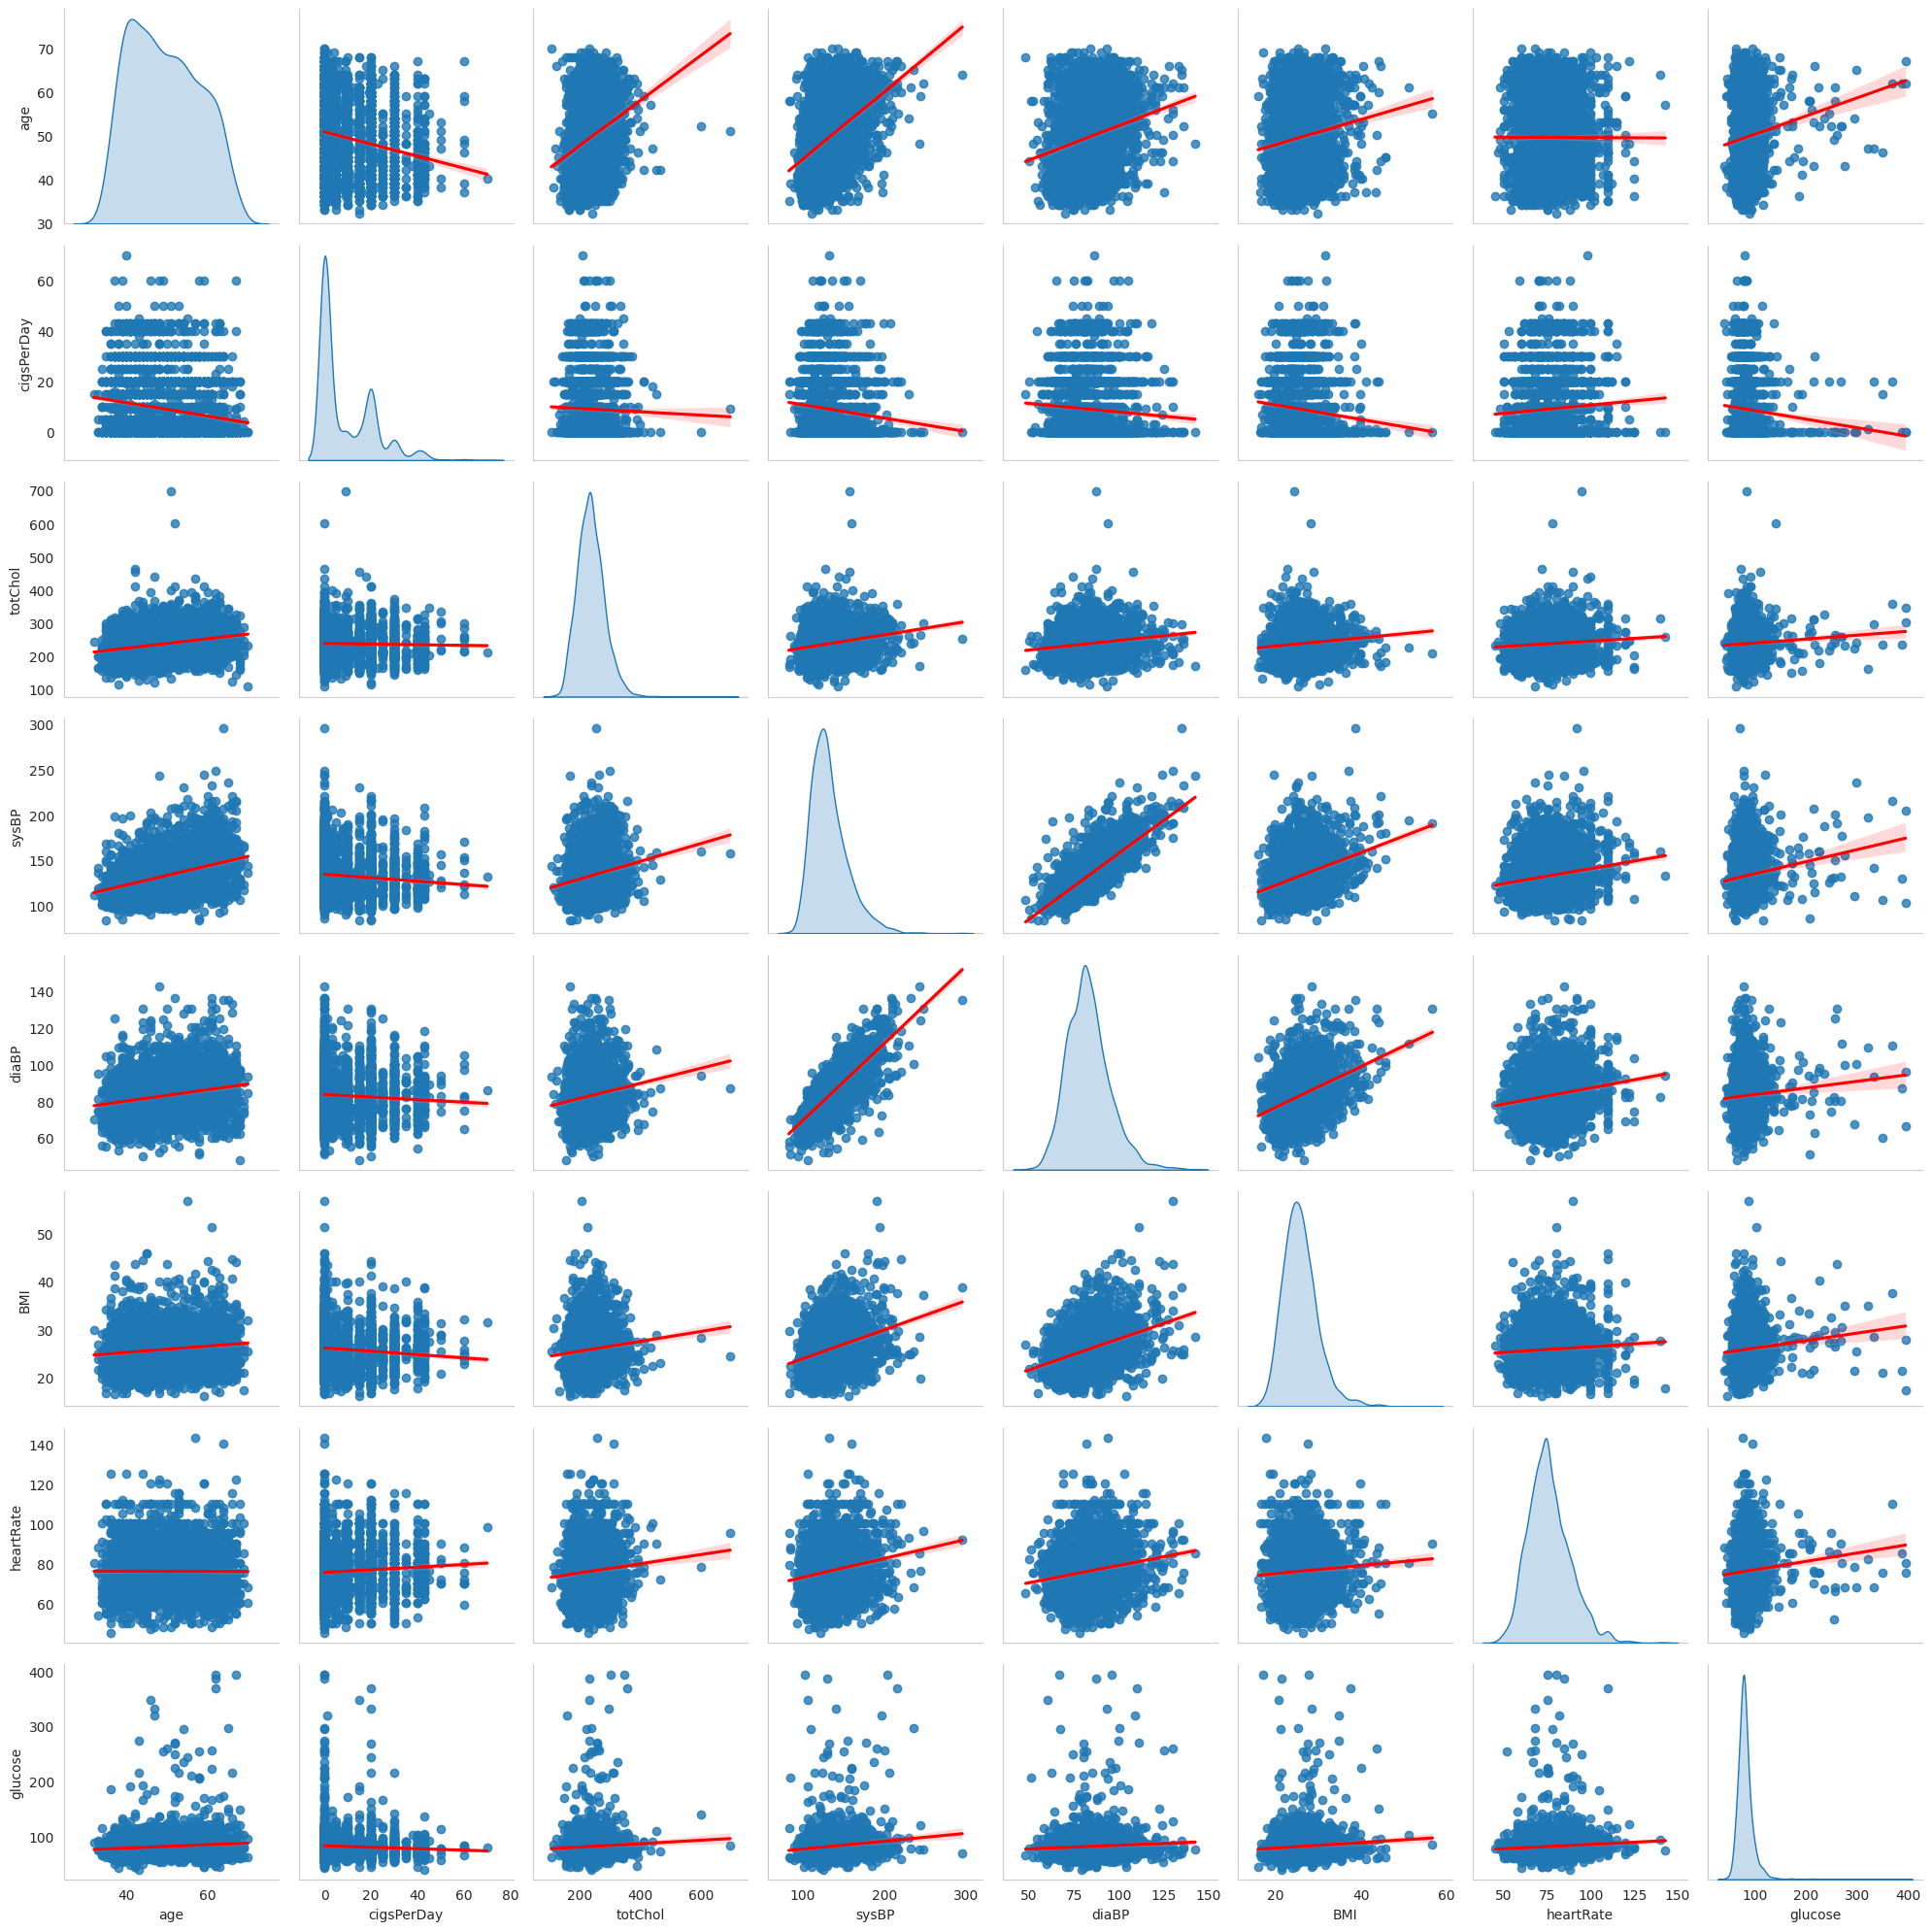

In [135]:
# Pair Plot visualization code
cols_to_plot = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP','BMI','heartRate','glucose']
# sns.pairplot(newdf, hue='TenYearCHD')
# Use plot_kws to change regression line colour
sns.pairplot(newdf[cols_to_plot], kind='reg', diag_kind='kde',
             plot_kws={'line_kws':{'color':'red'}})

##### 1. Why did you pick the specific chart?

- Pairplot allows us to plot pairwise relationships between variables within a dataset. This creates a nice visualisation and helps us understand the data by summarising a large amount of data in a single figure. This is essential when we are exploring our dataset and trying to become familiar with it.

##### 2. What is/are the insight(s) found from the chart?

- Data is clearly showing strong linear relation among variables.
- There are few outliers as well.
- Data is bit skewed in'cigsPerDay' variable,which need to be treated.

## ***5. Hypothesis Testing***

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

- Null hypothesis (H0): Data follows a normal distribution.
- Alternate Hypothesis (H1): Data does not follow a normal distribution.

#### 2. Perform an appropriate statistical test.

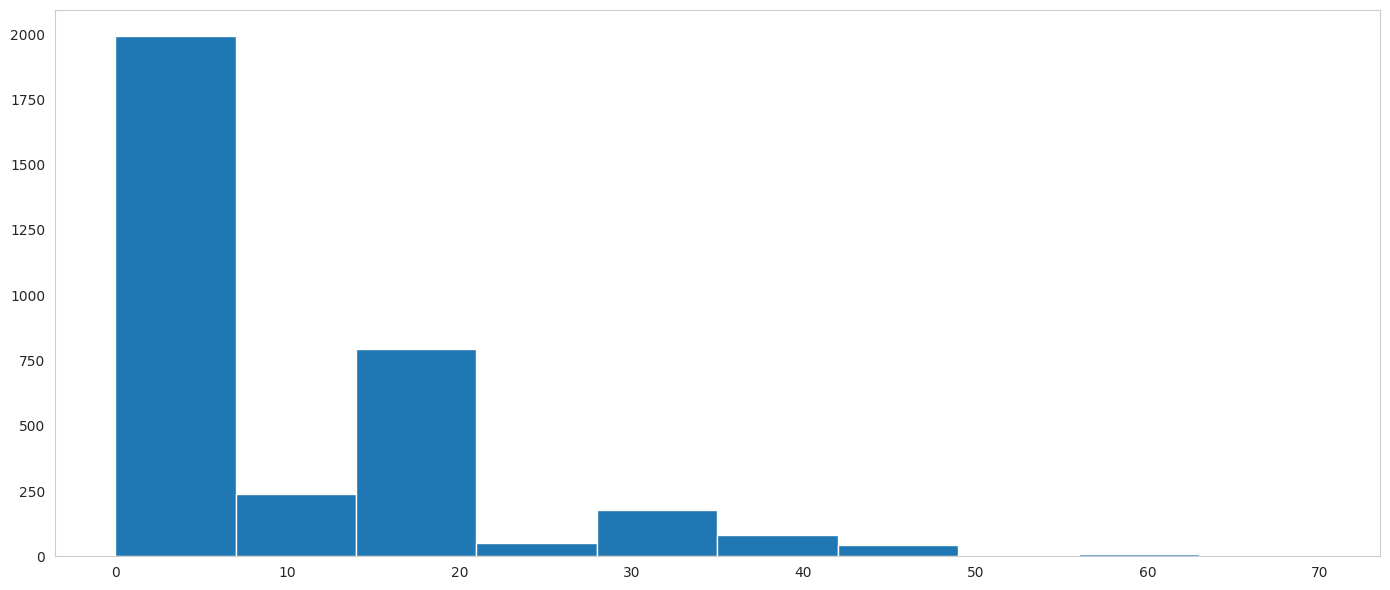

In [137]:
#Cheking Histogram
import matplotlib
from matplotlib import pyplot 
%matplotlib inline
pyplot.figure(figsize=(14,6))
pyplot.hist(df['cigsPerDay'])
pyplot.show()

In [138]:
# Perform Statistical Test to obtain P-Value

#Help from Python
from scipy.stats import shapiro #importing shapiro library

DataToTest = df['cigsPerDay']

stat, p = shapiro(DataToTest) #applying

print('stat=%.2f, p=%.30f' % (stat, p))

if p > 0.05:
    print('Normal distribution')
else:
    print('Not a normal distribution')

stat=0.76, p=0.000000000000000000000000000000
Not a normal distribution


##### Which statistical test have you done to obtain P-Value?

- Shapiro-Wilk Test

##### Why did you choose the specific statistical test?

- It is preferable that normality be assessed both visually and through normality tests, of which the Shapiro-Wilk test is highly recommended.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

- Null hypothesis (H0): Continous Data is highly correlated
- Alternate Hypothesis (H1): Continous Data not correlated

#### 2. Perform an appropriate statistical test.

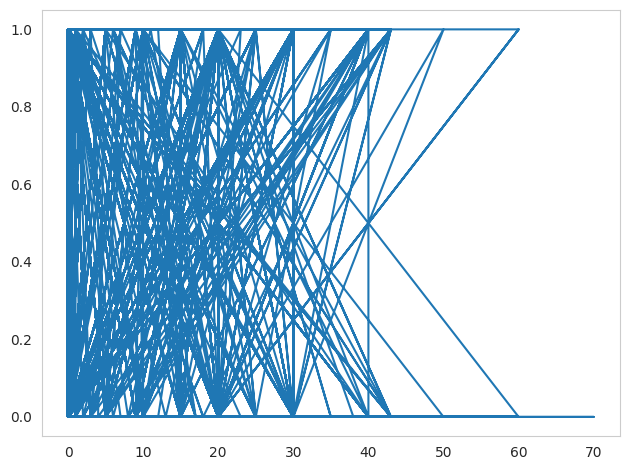

In [139]:
FirstSample = df['cigsPerDay']
SecondSample = df['TenYearCHD']

pyplot.plot(FirstSample,SecondSample)
pyplot.show()

In [140]:
# Perform Statistical Test to obtain P-Value

#Spearman Rank Correlation
from scipy.stats import spearmanr
stat, p = spearmanr(FirstSample, SecondSample)

print('stat=%.3f, p=%5f' % (stat, p))
if p > 0.05:
    print('independent samples')
else:
    print('dependent samples')

stat=0.057, p=0.000866
dependent samples


##### Which statistical test have you done to obtain P-Value?

- Spearman Rank Correlation

##### Why did you choose the specific statistical test?

- Spearman's rank correlation measures the strength and direction of association between two ranked variables.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

- Null hypothesis (H0): Categorical Data is highly correlated
- Alternate Hypothesis (H1): Categorical Data not correlated

#### 2. Perform an appropriate statistical test.

In [141]:
contingency_data = pd.crosstab(df['sex'], df['is_smoking'],margins = False)
contingency_data

is_smoking,NO,YES
sex,,
F,1147,776
M,556,911


In [142]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import chi2_contingency

stat, p, dof, expected = chi2_contingency(contingency_data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('independent categories')
else:
    print('dependent categories')

stat=156.542, p=0.000
dependent categories


##### Which statistical test have you done to obtain P-Value?

- Chi square test

##### Why did you choose the specific statistical test?

- Chi-square test is used to check independence of two categorical variables. It allows you to test whether the two variables are related to each other

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [143]:
# Handling Missing Values & Missing Value Imputation

# Percentage of null values in ml_df
ml_df.isnull().mean()*100

age                0.0
education          0.0
sex                0.0
is_smoking         0.0
cigsPerDay         0.0
BPMeds             0.0
prevalentStroke    0.0
prevalentHyp       0.0
diabetes           0.0
totChol            0.0
sysBP              0.0
diaBP              0.0
BMI                0.0
heartRate          0.0
glucose            0.0
TenYearCHD         0.0
dtype: float64

In [144]:
# Check Unique Values for each variable.

#creating a column list 
categorical_variables = ['education','sex','is_smoking','BPMeds','prevalentStroke','prevalentHyp','diabetes','TenYearCHD']

#checking the unique values
for col in categorical_variables:
  print(f'Unique values for {col}: {ml_df[col].unique()}')

Unique values for education: [2. 4. 1. 3.]
Unique values for sex: ['F' 'M']
Unique values for is_smoking: ['YES' 'NO']
Unique values for BPMeds: [0. 1.]
Unique values for prevalentStroke: [0 1]
Unique values for prevalentHyp: [0 1]
Unique values for diabetes: [0 1]
Unique values for TenYearCHD: [1 0]


#### What all missing value imputation techniques have you used and why did you use those techniques?


 - Less than 10% overall data is missing,this is not major and can easily be handeled by replacing with median values, we used median values as it will not affect data skewness.
 - Data type format of variables are also incorrect which is corrected.

### 2. Handling Outliers

In [145]:
# Lets check the discrete and continuous features
categorical_features = [i for i in ml_df.columns if ml_df[i].nunique()<=4]
numeric_features = [i for i in ml_df.columns if i not in categorical_features]

print(f'categorical_features {categorical_features}')
print(f'numeric_features {numeric_features}')

categorical_features ['education', 'sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD']
numeric_features ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']


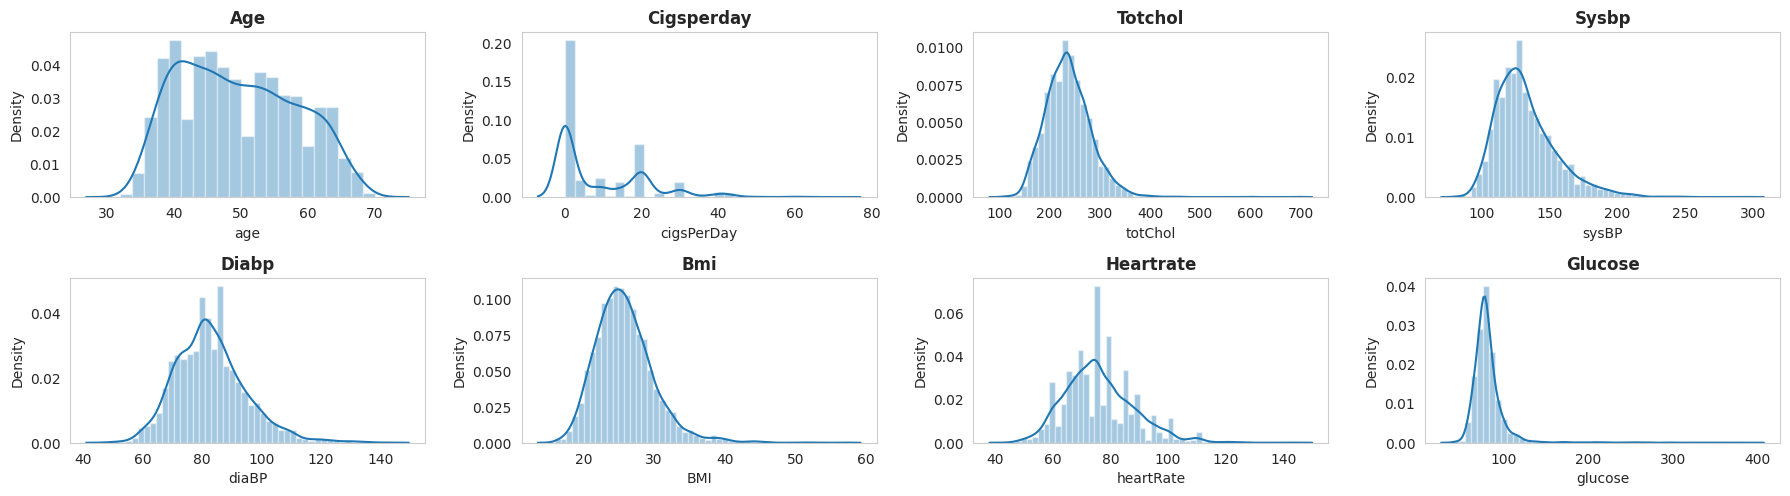

In [146]:
# Visualizing the distributions.
plt.figure(figsize=(18,12))
for n,column in enumerate(numeric_features):
  plt.subplot(5, 4, n+1)
  sns.distplot(ml_df[column])
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

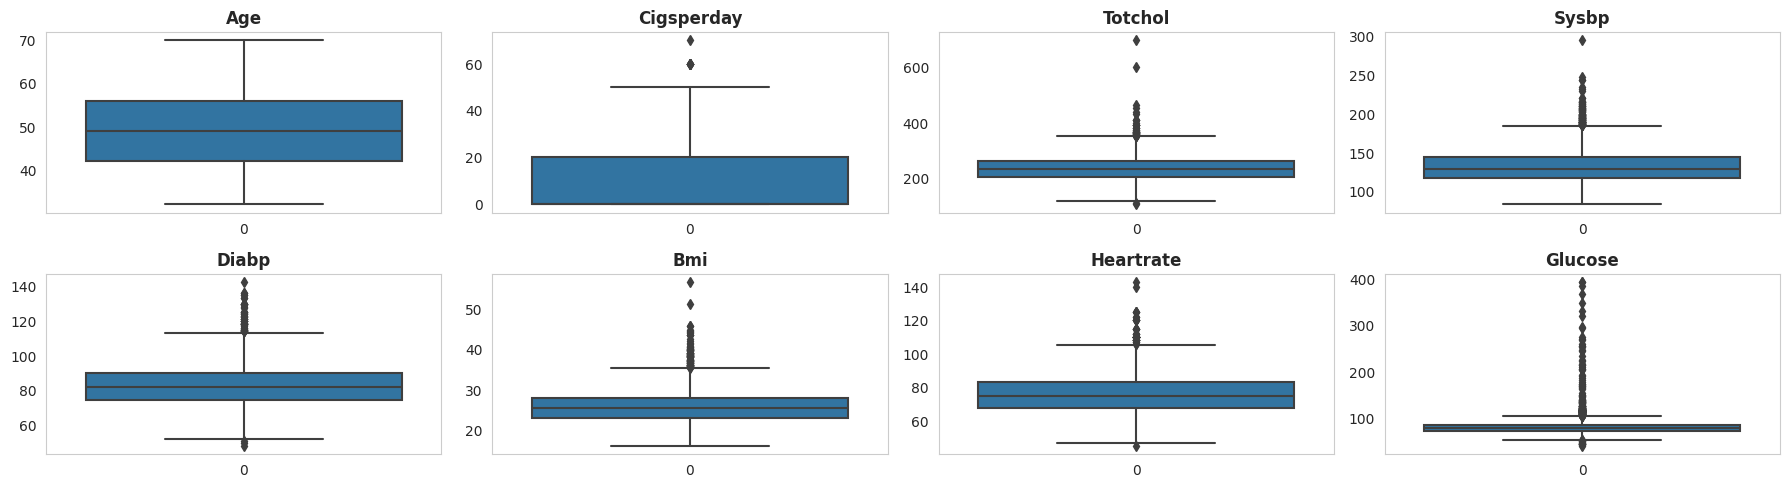

In [147]:
# Visualizing outliers.
plt.figure(figsize=(18,12))
for n,column in enumerate(numeric_features):
  plt.subplot(5, 4, n+1)
  sns.boxplot(ml_df[column])
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

- 'cigsPerDay' variable is completely skewed and data seems not normally distributed, lets try to find if it is because of presence of outliers?

In [148]:
ml_df.shape

(3390, 16)

In [149]:
# Using IQR method to find outliers
# Replacing outliers with median values

ml_df_new = ml_df.copy()
for col in numeric_features:
  # Using IQR method to define the range of inliners:
  q1, q3, median = ml_df_new[col].quantile([0.25,0.75,0.5])
  lower_limit = q1 - 1.5*(q3-q1)
  upper_limit = q3 + 1.5*(q3-q1)

  # Replacing Outliers with median value
  ml_df_new[col] = np.where(ml_df_new[col] > upper_limit, median,np.where(
                         ml_df_new[col] < lower_limit,median,ml_df_new[col]))

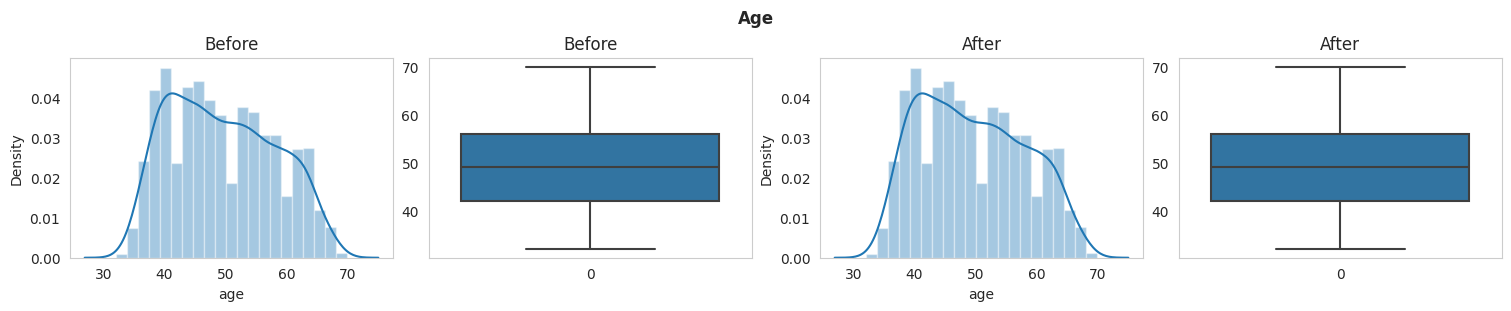

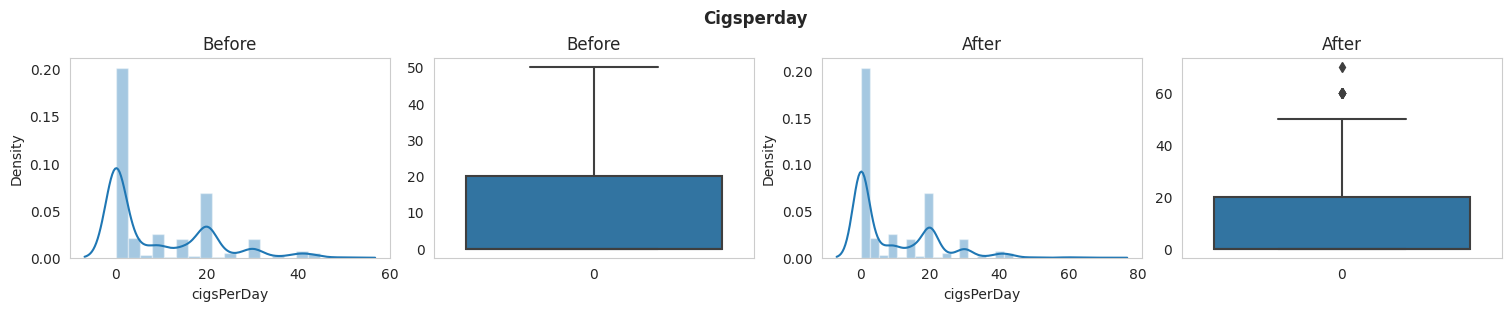

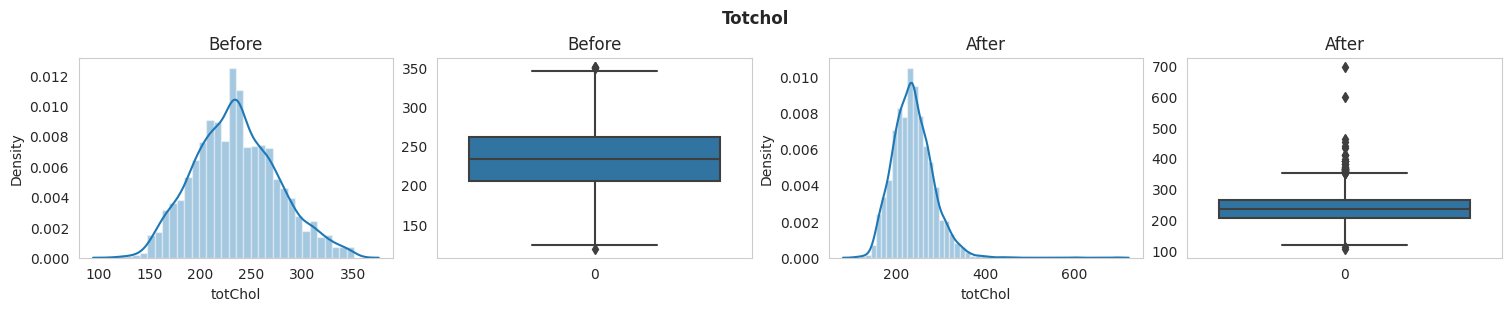

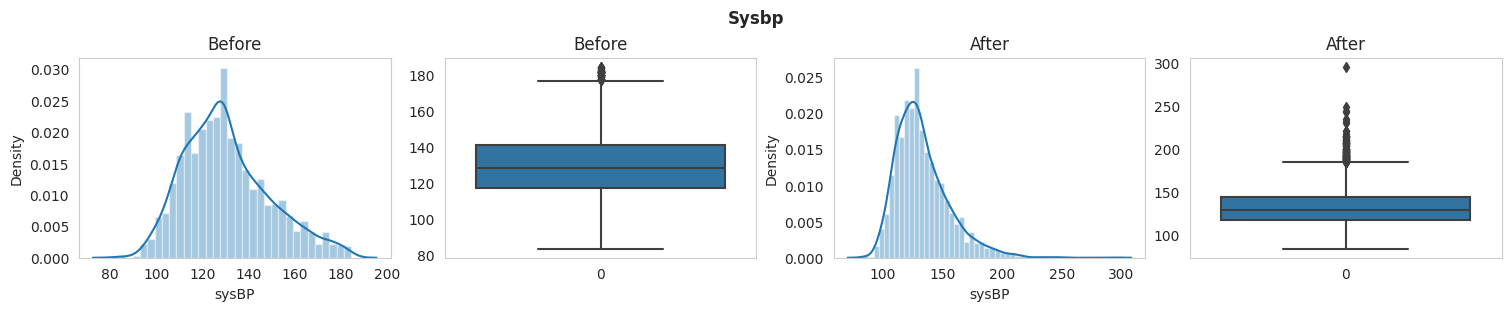

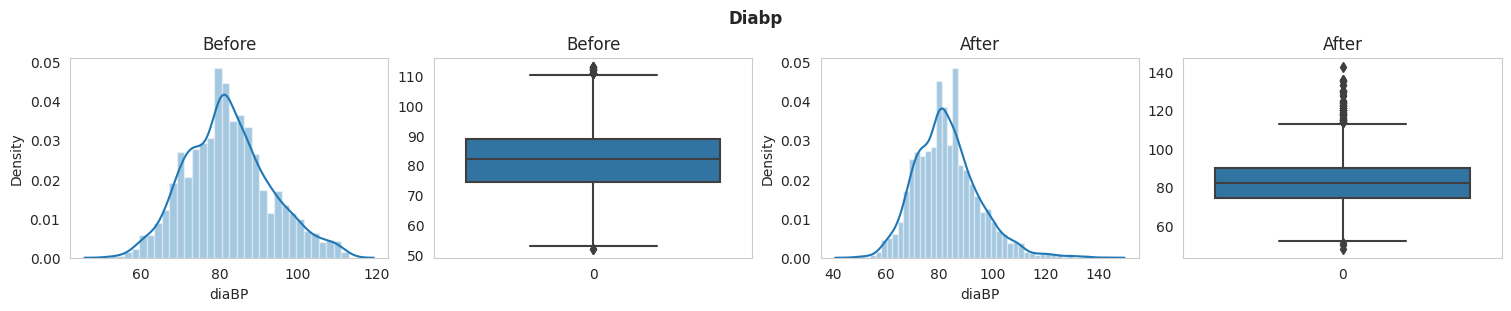

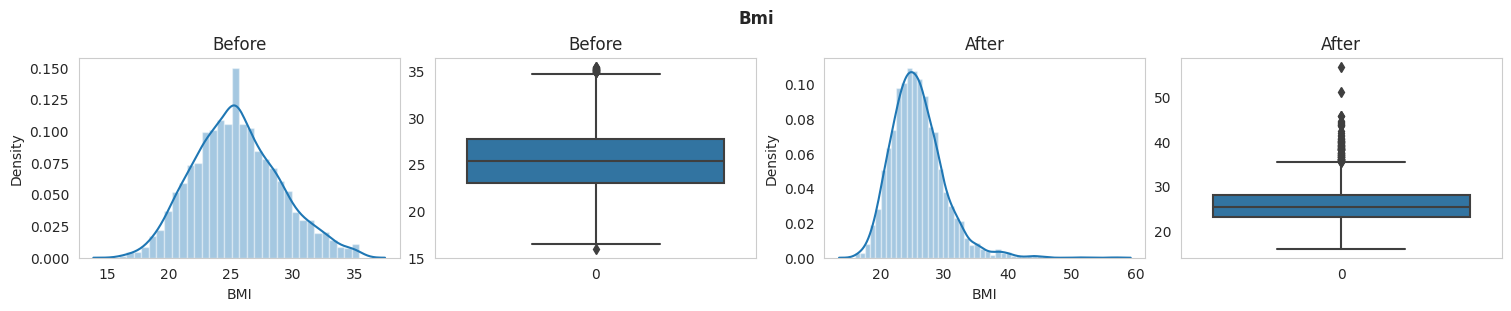

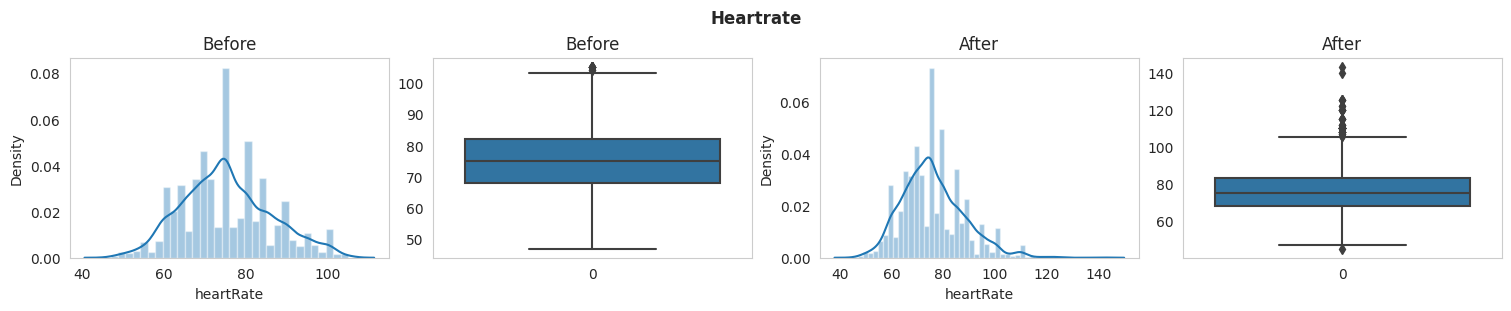

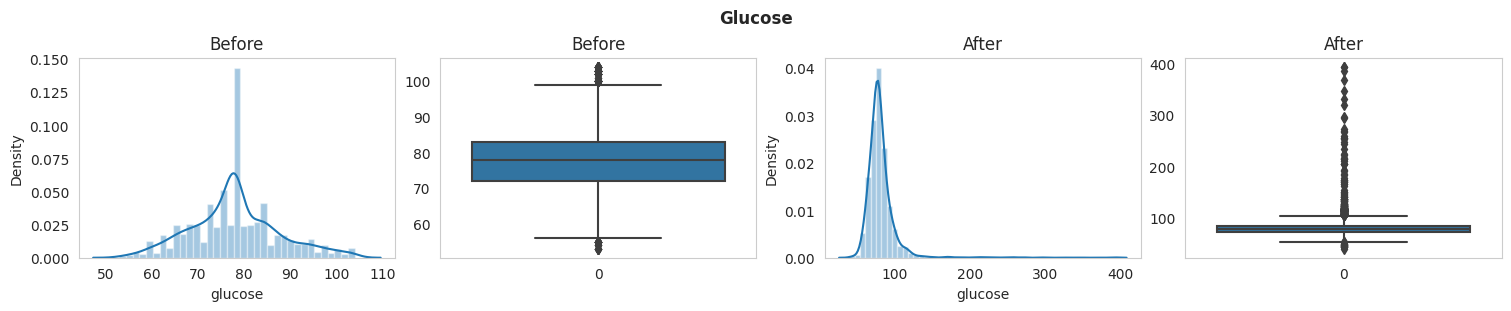

In [150]:
# Plotting Graphs Before treating outliers 
for col in numeric_features:
  fig, ax =plt.subplots(1,4, constrained_layout=True)
  fig.set_size_inches(15, 3)
  sns.distplot(ml_df_new[col], ax=ax[0]).set(title="Before")
  sns.boxplot(ml_df_new[col], ax=ax[1]).set(title="Before")
  # After treating outliers
  sns.distplot(ml_df[col], ax=ax[2]).set(title="After")
  sns.boxplot(ml_df[col], ax=ax[3]).set(title="After")
  plt.suptitle(f'{col.title()}',weight='bold')
  fig.show()

In [151]:
ml_df_new.shape

(3390, 16)

##### What all outlier treatment techniques have you used and why did you use those techniques?

* We used **IQR to outliers** :
 
When we need to remove bad data from left or right skewed distribution we use IQR also known as Inter Quartile Range.

* We used **median values to replace outliers** :
 
 * We used median values to fill the outliers so that distribution remains the same

### 3. Categorical Encoding

In [152]:
# Checking unique value with their counts in categorical features
for col in ['sex', 'is_smoking']:
  print(ml_df_new[col].value_counts(),'\n')

F    1923
M    1467
Name: sex, dtype: int64 

NO     1703
YES    1687
Name: is_smoking, dtype: int64 



In [153]:
# Encode your categorical columns
# Defining a label encoder based on above data
encoder = {'sex':{'M':1, 'F':0},'is_smoking':{'YES':1, 'NO': 0}}

# Label Encoding
ml_df_new = ml_df_new.replace(encoder)

In [154]:
ml_df_new.head(1)

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64.0,2.0,0,1,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1


#### What all categorical encoding techniques have you used & why did you use those techniques?

- We used **label encoding**
 - Label Encoding refers to converting the labels into a numeric form so as to convert them into the machine-readable form
 - We used simple label encoding because we had just two categories in each variable.

### 4. Feature Manipulation & Selection

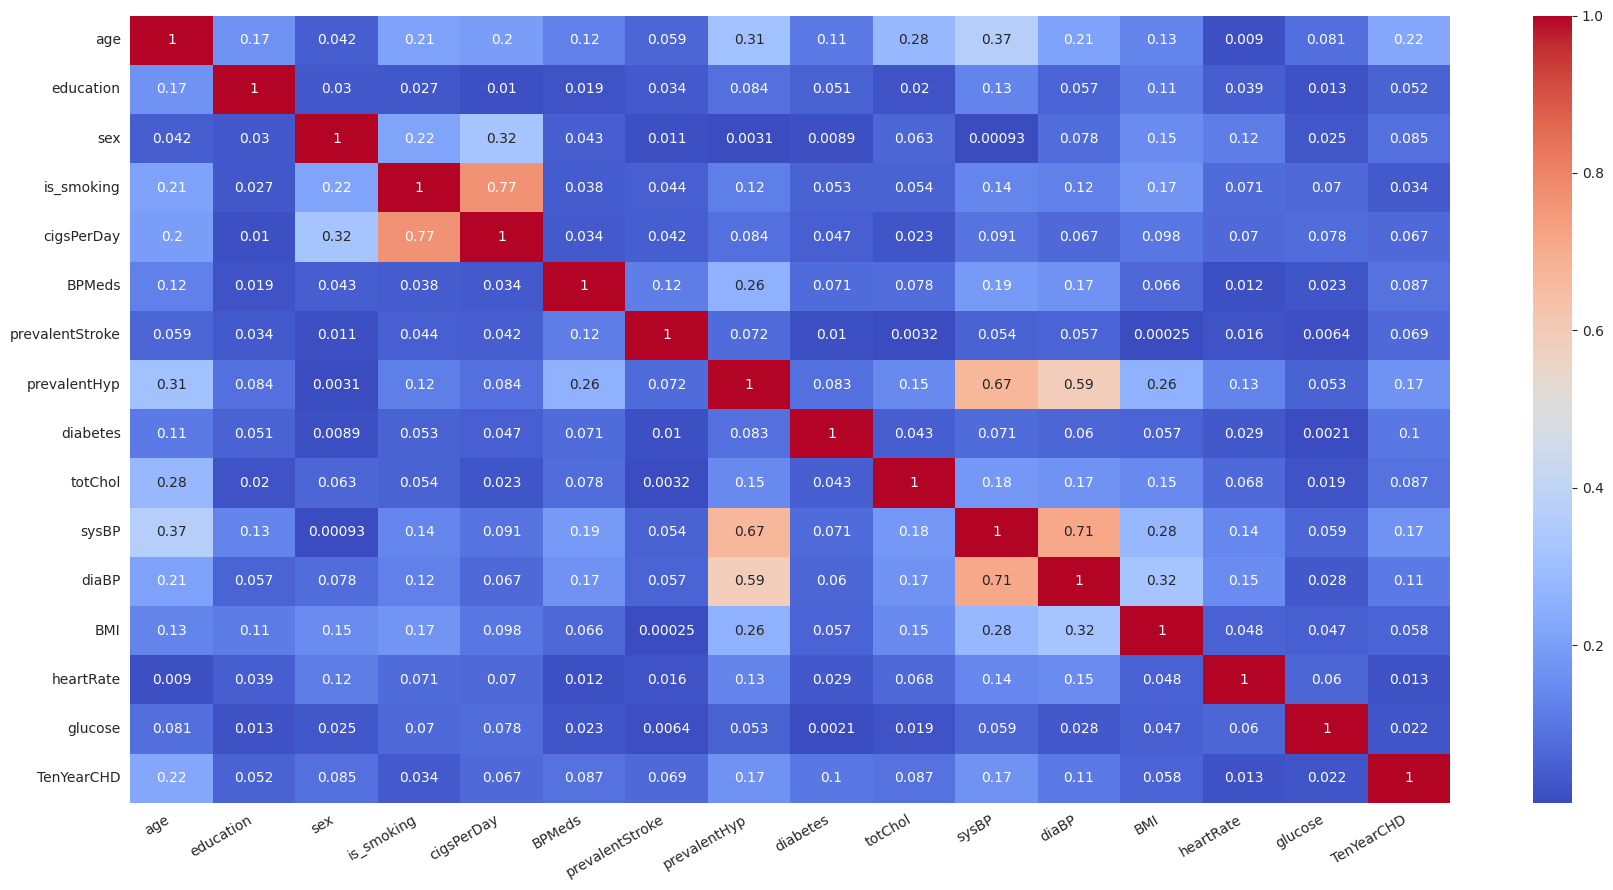

In [155]:
# Checking corelations
plt.figure(figsize=(18,9))
plot=sns.heatmap(abs(ml_df_new.corr()), annot=True, cmap='coolwarm')
plot.set_xticklabels(plot.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()

#### 1. Feature Manipulation

In [156]:
# Manipulate Features to minimize feature correlation and create new features

Systolic and Diastolic blood pressure has a high correlation that can be commonly classified into hypertension.

In [157]:
#Systolic and Diastolic blood pressure has a high correlation and we classified different levels of it

def blood_presure_classification(SysBP, DiaBP):
  if (SysBP < 90) or (DiaBP < 60):
    return 0 # 'Hypotension'
  if (SysBP < 120) and (DiaBP < 80):
    return 1 # 'Optimal'
  if (SysBP < 130) or (DiaBP < 86):
    return 2 # 'Normal'
  if (SysBP < 140) or (DiaBP < 90):
    return 3 # 'PreHypertensive'
  if (SysBP > 140) and (DiaBP < 90):
    return 4 # 'IsolatedSystolicHypertension'
  if (SysBP < 160) or (DiaBP < 100):
    return 5 # 'GradeI'
  if (SysBP < 180) or (DiaBP < 110):
    return 6 # 'GradeII'
  return 7 # 'GradeIII'

In [158]:
# Creating new column to represent a patient is suffering from which level of hypertension
ml_df_new['Hypertension'] = ml_df_new.apply(lambda x: blood_presure_classification(x['sysBP'],x['diaBP']),axis=1)
ml_df_new.head(2)

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,Hypertension
0,64.0,2.0,0,1,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1,2
1,36.0,4.0,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0,5


#### 2. Feature Selection

In [159]:
# Select your features wisely to avoid overfitting

In [160]:
# remove not useful columns
ml_df_new.drop(columns=['prevalentHyp', 'sysBP', 'diaBP', 'is_smoking'], inplace=True)
ml_df_new.head(1)

,age,education,sex,cigsPerDay,BPMeds,prevalentStroke,diabetes,totChol,BMI,heartRate,glucose,TenYearCHD,Hypertension
0,64.0,2.0,0,3.0,0.0,0,0,221.0,25.38,90.0,80.0,1,2


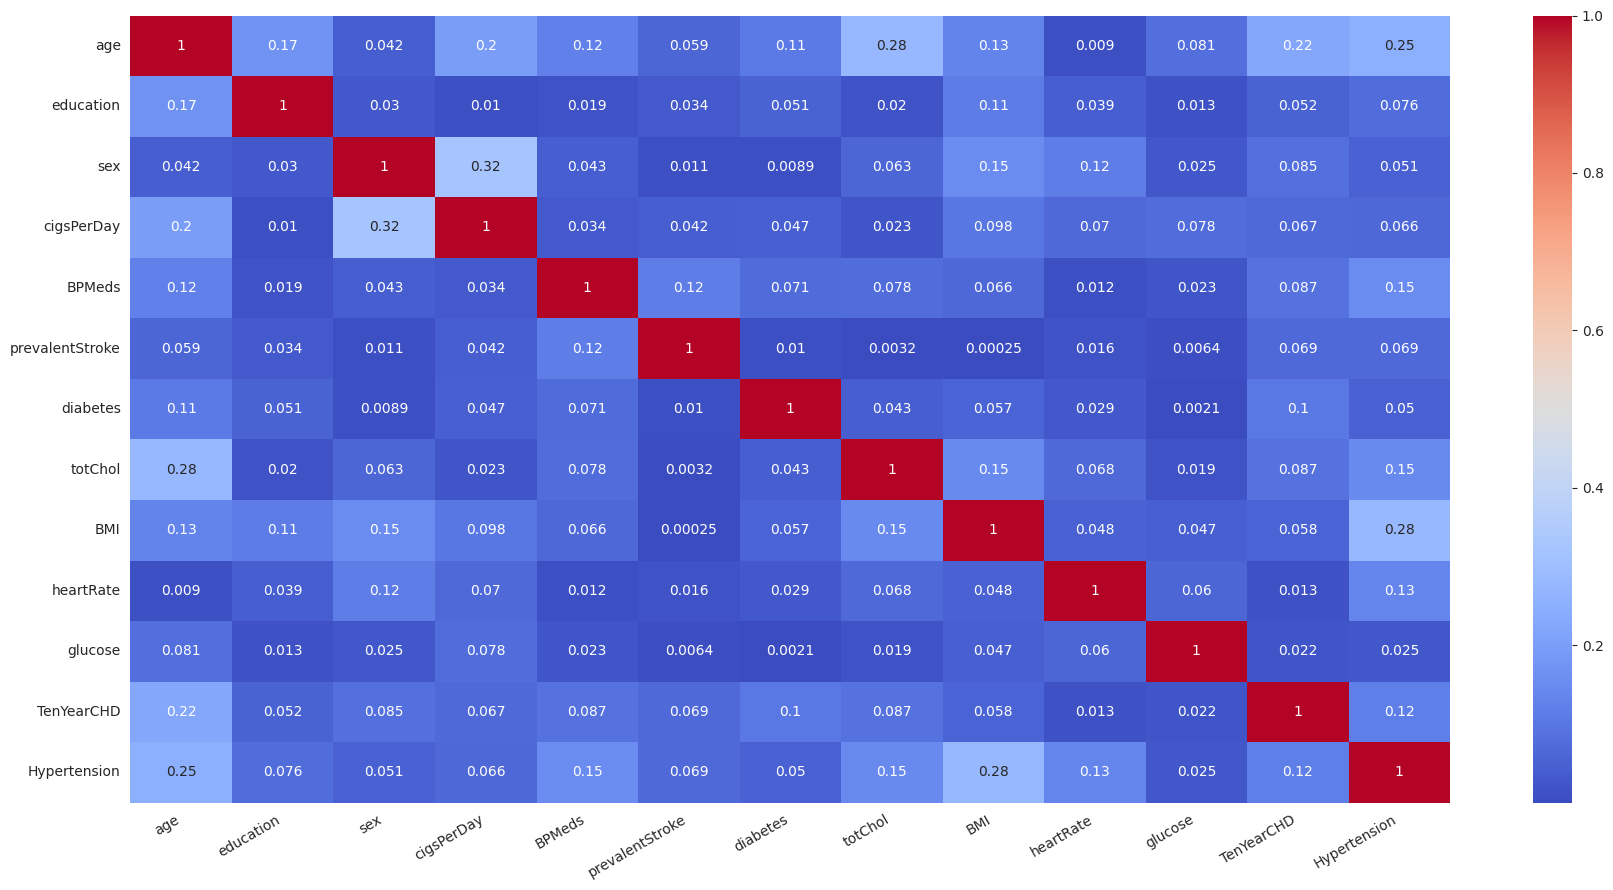

In [161]:
# Checking corelations again
plt.figure(figsize=(18,9))
plot=sns.heatmap(abs(ml_df_new.corr()), annot=True, cmap='coolwarm')
plot.set_xticklabels(plot.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()

##### What all feature selection methods have you used  and why?

* We are using **Correlation Coefficient method** for feature selection.

* Features with high correlation are more linearly dependent and hence have almost the same effect on the dependent variable. So, when two features have high correlation, we can drop one of the two features.

##### Which all features you found important and why?

- 'smoking' and 'cigsperday' independent features were highly linearly dependent,so we removed smoaking as it is a understood fact which can be derived from cigsperday.
- Similarly 'sisbp' and 'diabp' were also highly correlated so we created new column 'hypertension', to remove such correlation among independent variables.
- At last we removed independent variables which were of no use or were showing high correlation.

### 5. Handling Imbalance Dataset

##### Do you think the dataset is imbalanced? Explain Why.

In [162]:
# TenYearCHD should be the last col

columns=list(ml_df_new.columns)
columns.remove('TenYearCHD')
columns.append('TenYearCHD')
ml_df_new=ml_df_new[columns]
ml_df_new.head(1)

,age,education,sex,cigsPerDay,BPMeds,prevalentStroke,diabetes,totChol,BMI,heartRate,glucose,Hypertension,TenYearCHD
0,64.0,2.0,0,3.0,0.0,0,0,221.0,25.38,90.0,80.0,2,1


In [163]:
X= ml_df_new.iloc[:,0:12]
y= ml_df_new.iloc[:,-1]

In [164]:
# Count of objects inside dependent variable
from collections import Counter
print('Dependent variable object count %s' % Counter(y))

Dependent variable object count Counter({0: 2879, 1: 511})


<Axes: title={'center': 'Target variable before SMOTE'}>

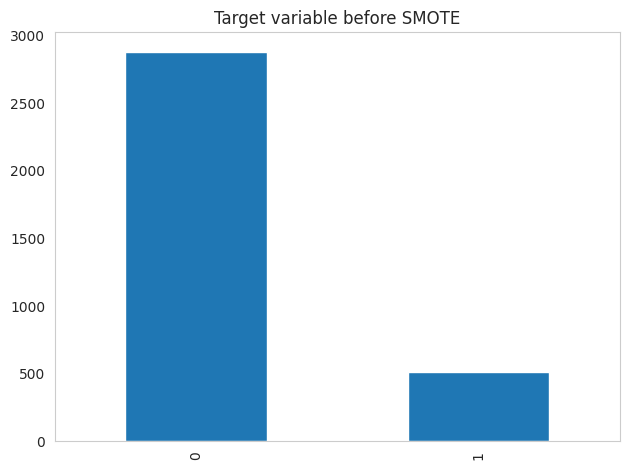

In [165]:
# visualize the target variable before SMOTE
y.value_counts().plot(kind='bar', title='Target variable before SMOTE')

In [166]:
# Oversampling using SMOTE
smote = SMOTE()

# fit predictor and target variable
X_smote, y_smote = smote.fit_resample(X,y)

print('Samples in the original dataset', len(y))
print('Samples in the resampled dataset', len(y_smote))
     

Samples in the original dataset 3390
Samples in the resampled dataset 5758


<Axes: title={'center': 'Target variable after SMOTE'}>

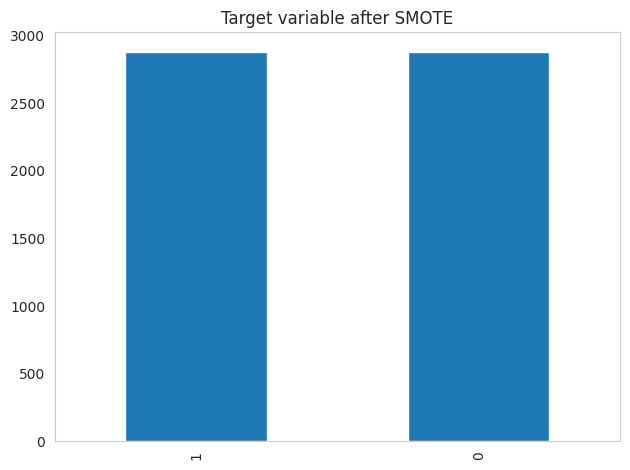

In [167]:
# visualize the target variable after SMOTE
y_smote.value_counts().plot(kind='bar', title='Target variable after SMOTE')

In [168]:
# Count of objects inside dependent variable
from collections import Counter
print('Dependent variable object count %s' % Counter(y_smote))

Dependent variable object count Counter({1: 2879, 0: 2879})


##### What technique did you use to handle the imbalance dataset and why?

- Imbalanced data refers to those types of datasets where the target class has an uneven distribution of observations.
- It is quite clear that dataset is highly skewed.

- Since we are dealing with unbalanced data, ie, only ~15% of the patients were diagnosed with coronary heart disease, we oversample the train dataset using SMOTE (Synthetic Minority Oversampling Technique).
- This ensures that the model has trained equally on all kinds of results, and it is not biased to one particular result.

### 6. Data Splitting

In [169]:
# split the data
X_train,X_test,y_train,y_test = train_test_split(X_smote,y_smote,test_size=0.2,random_state=0)

In [170]:
print(f'The shape of X_train is: {X_train.shape}')
print(f'The shape of y_train is: {y_train.shape}')
print(f'The shape of X_test is: {X_test.shape}')
print(f'The shape of y_test is: {y_test.shape}')

The shape of X_train is: (4606, 12)
The shape of y_train is: (4606,)
The shape of X_test is: (1152, 12)
The shape of y_test is: (1152,)


##### What data splitting ratio have you used and why? 

- We have used ratio of 80:20, which means 80% of the data is for training and 20% for testing.
- To detect a machine learning model behavior, we need to use observations that aren’t used in the training process. Otherwise, the evaluation of the model would be biased.

### 7. Data Scaling

In [171]:
# scaling the data using standard scaler

# making a ColumnTransformer object
scaler = StandardScaler()

# transforming data
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled,columns=X_train.columns)

X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [173]:
# Summary statistics after standardization
X_train_scaled.describe()


,age,education,sex,cigsPerDay,BPMeds,prevalentStroke,diabetes,totChol,BMI,heartRate,glucose,Hypertension
count,4.606000e+03,4.606000e+03,4.606000e+03,4.606000e+03,4.606000e+03,4.606000e+03,4.606000e+03,4.606000e+03,4.606000e+03,4.606000e+03,4.606000e+03,4.606000e+03
mean,-2.097999e-16,-8.330288e-17,4.319409e-17,2.468234e-17,3.085292e-18,-3.856615e-19,1.542646e-18,-4.828482e-16,-8.237730e-16,9.086185e-16,-3.879755e-16,-3.548086e-17
std,1.000109e+00,1.000109e+00,1.000109e+00,1.000109e+00,1.000109e+00,1.000109e+00,1.000109e+00,1.000109e+00,1.000109e+00,1.000109e+00,1.000109e+00,1.000109e+00
min,-2.261504e+00,-9.944497e-01,-7.932774e-01,-8.099539e-01,-2.291219e-01,-6.086469e-02,-1.354646e-01,-2.874924e+00,-2.883320e+00,-2.753906e+00,-2.729551e+00,-1.817133e+00
25%,-8.473127e-01,-9.944497e-01,-7.932774e-01,-8.099539e-01,-2.291219e-01,-6.086469e-02,-1.354646e-01,-6.989176e-01,-6.781823e-01,-7.222913e-01,-5.764773e-01,-3.055357e-01
50%,-1.641310e-02,7.542181e-02,-7.932774e-01,-6.570819e-01,-2.291219e-01,-6.086469e-02,-1.354646e-01,-3.286414e-02,-4.805057e-02,-5.044478e-02,9.485531e-03,-3.055357e-01
75%,8.091631e-01,6.475410e-01,1.260593e+00,8.738408e-01,-2.291219e-01,-6.086469e-02,-1.354646e-01,6.640754e-01,6.532213e-01,6.254205e-01,5.572929e-01,4.502631e-01
max,2.216769e+00,2.215165e+00,1.260593e+00,3.399533e+00,5.579695e+00,1.642989e+01,7.382004e+00,2.672697e+00,2.899965e+00,2.846121e+00,2.858084e+00,3.473458e+00


##### Which method have you used to scale you data and why?

* We used **Standard Scaler** method to scale our dataset.
* StandardScaler comes into play when values differ greatly between their ranges, or simply when they are measured in different units of measure.
* We can see that after using StandardScaler, all the features have mean close to 0 and standard deviation of approx 1.

### 8 . Dimentionality Reduction

##### Do you think dimentionality reduction is needed?Explain why?

* Dimentionality reduction is required when the size of the data is huge and you need to lower the number of dimension to reduce the computation cost for deployed model.For now this is not needed.

## ***7. ML Model Implementation***

- Since we are looking at medical data, missing a diagnosis of cardiovascular disease could be deadly. But we had to weight that against misdiagnosing too many people that don't have the disease and telling them to get a bunch of expensive tests,which will be metally and financially draining,they might be even suffering from other kind of diseases. So we also don't want to ignore the accuracy of the prediction, thus we walked a fine line.

- That is why looking at F1 score (conveys the balance between the precision and the recall) and False Negatives are so important for our predictions.


### Creating function  to evaluate models

In [174]:
#Columns needed to compare metrics
comparison_columns = ['Model_Name', 'Train_Accuracy', 'Train_Recall','Train_Precision','Train_F1_Score','Test_Accuracy', 'Test_Recall','Test_Precision','Test_F1_Score']

In [175]:
#function to evaluate the model
def model_evaluation(model_name,model_variable,X_train_scaled,y_train,X_test_scaled,y_test,random_state=0):
  ''' This function predicts and evaluates various models for algorithms, visualizes results 
      and creates a dataframe that compares the various models.'''
      
  #making predictions
  # Get the predicted probabilities
  train_pred = model_variable.predict(X_train_scaled)
  test_pred = model_variable.predict(X_test_scaled)

  #calculate metrics and print the results for test set

  # Accuracy
  Accuracy_train = accuracy_score(train_pred,y_train)
  Accuracy_test = accuracy_score(test_pred,y_test)

  # Recall
  Recall_train = recall_score(train_pred,y_train)
  Recall_test = recall_score(test_pred,y_test)

  # Precision
  Precision_train = precision_score(train_pred,y_train)
  Precision_test = precision_score(test_pred,y_test)

  # F1 Score
  F1_Score_train = f1_score(train_pred,y_train)
  F1_Score_test = f1_score(test_pred,y_test)  

  #printing test results
  print(f'Accuracy for the validation set is {Accuracy_test}')
  print(f'Recall for the validation set is {Recall_test}')
  print(f'Precision for the validation set is {Precision_test}')
  print(f'F1 Score for the validation set is {F1_Score_test}')  

  #Saving our results
  global comparison_columns
  metric_scores = [model_name,Accuracy_train,Recall_train,Precision_train,F1_Score_train,Accuracy_test,Recall_test,Precision_test,F1_Score_test]
  final_dict = dict(zip(comparison_columns,metric_scores))
  return [final_dict]

In [176]:
#function to create the comparison table
final_list = []
def add_list_to_final_df(dict_list):
  global final_list
  for elem in dict_list:
    final_list.append(elem)
  global comparison_df
  comparison_df = pd.DataFrame(final_list, columns= comparison_columns)

**Choice of prediction model**:
- We are solving a binary classification problem.
- Our baseline model will be a simple Logistic Regression Model.
- We will then try and compare the results will other models.
- We will also do hyperparameter tuning to bring our better working models.

### ML Model - 1 - Logistic Regression(Baseline Model)

Logistic regression is a data analysis technique that uses mathematics to find the relationships between two data factors. It then uses this relationship to predict the value of one of those factors based on the other. The prediction usually has a finite number of outcomes, like yes or no.

In [177]:
# ML Model - 1 Logistic Regression

# making an object for Logistic Regression
lr = LogisticRegression(random_state=0)

# Fit the Algorithm
model1=lr.fit(X_train_scaled,y_train)

# Get the predicted probabilities
train_pred = model1.predict(X_train_scaled)
test_pred = model1.predict(X_test_scaled)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

              precision    recall  f1-score   support

           0       0.63      0.64      0.63       553
           1       0.66      0.66      0.66       599

    accuracy                           0.65      1152
   macro avg       0.65      0.65      0.65      1152
weighted avg       0.65      0.65      0.65      1152



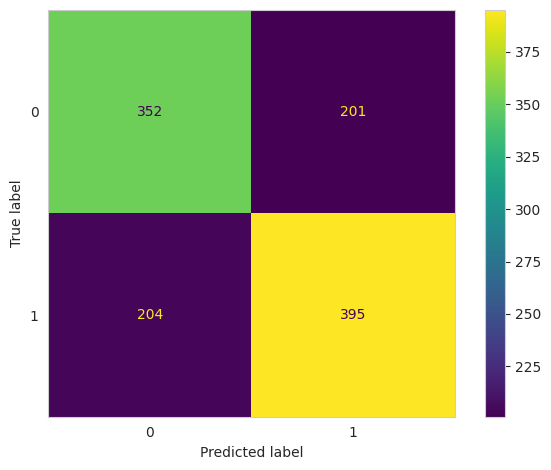

In [178]:
# Create classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,test_pred))

# this line removes the grid from the confusion matrix
sns.set_style("whitegrid", {'axes.grid' : False})

# Generate predictions
ConfusionMatrixDisplay.from_predictions(y_test,test_pred)
plt.show()

# Generate confusion matrix
from sklearn.metrics import confusion_matrix
cm1=confusion_matrix(y_test,test_pred)

In [179]:
# Visualizing evaluation Metric Score chart

# logistic regression evaluation
log_model = model_evaluation('Logistic Regression',model1,X_train_scaled,y_train,X_test_scaled,y_test)

#add results to comparison df
add_list_to_final_df(log_model)

#comparison df
comparison_df

Accuracy for the validation set is 0.6484375
Recall for the validation set is 0.662751677852349
Precision for the validation set is 0.659432387312187
F1 Score for the validation set is 0.6610878661087867


,Model_Name,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,Logistic Regression,0.66066,0.6521,0.674123,0.662929,0.648438,0.662752,0.659432,0.661088


#### 2. Cross- Validation & Hyperparameter Tuning

In [180]:
# ML Model - Tuned Logistic Regression

# Instantiate classifier
LG = LogisticRegression(random_state=0)

# set parameter criteria
param_grid_LG = {
    'penalty': ['l1', 'l2'],
    'C':[0.05, 0.1, 1], 
    'class_weight' : [None, {1 : 1.5}], 
    'random_state' : [0]
}

# Instantiate Grid Search
GS_LG = GridSearchCV(LG, param_grid_LG, scoring= 'recall')

# fit model
GS_LG.fit(X_train_scaled, y_train)

# Get the predicted probabilities
train_pred = GS_LG.predict(X_train_scaled)
test_pred = GS_LG.predict(X_test_scaled)

In [181]:
GS_LG.best_params_

{'C': 0.05, 'class_weight': {1: 1.5}, 'penalty': 'l2', 'random_state': 0}

              precision    recall  f1-score   support

           0       0.74      0.47      0.58       553
           1       0.64      0.85      0.73       599

    accuracy                           0.67      1152
   macro avg       0.69      0.66      0.65      1152
weighted avg       0.69      0.67      0.66      1152



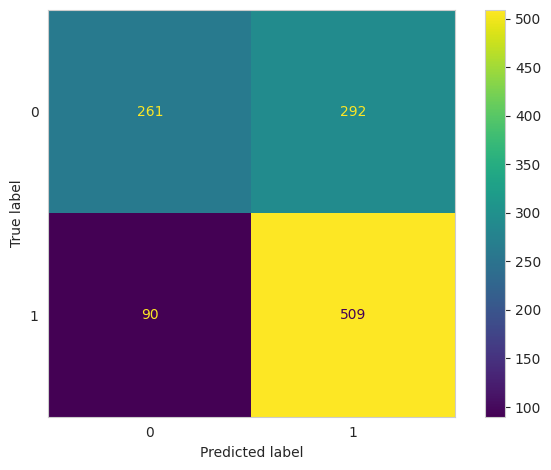

In [182]:
# Create classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,test_pred))

# this line removes the grid from the confusion matrix
sns.set_style("whitegrid", {'axes.grid' : False})

# Generate predictions
ConfusionMatrixDisplay.from_predictions(y_test,test_pred)
plt.show()

# Generate confusion matrix
from sklearn.metrics import confusion_matrix
cm1=confusion_matrix(y_test,test_pred)

##### Which hyperparameter optimization technique have you used and why?

- We used GridSearchCV both for cross validating and hyperparameter tuning values to get the best results from our model.
-  Advantages: exhaustive search, will find the absolute best value for the hyperparameter based on the training set. 
- Disadvantages: time-consuming, danger of overfitting.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [183]:
# Visualizing evaluation Metric Score chart

#save the best parameters
random_LG = GS_LG.best_estimator_

# logistic regression evaluation
log_model_1 = model_evaluation('Tuned Logistic Regression',random_LG,X_train_scaled,y_train,X_test_scaled,y_test)

#add results to comparison df
add_list_to_final_df(log_model_1)

#comparison df
comparison_df

Accuracy for the validation set is 0.6684027777777778
Recall for the validation set is 0.6354556803995006
Precision for the validation set is 0.8497495826377296
F1 Score for the validation set is 0.7271428571428571


,Model_Name,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,Logistic Regression,0.660660,0.652100,0.674123,0.662929,0.648438,0.662752,0.659432,0.661088
1,Tuned Logistic Regression,0.653713,0.611673,0.822807,0.701702,0.668403,0.635456,0.849750,0.727143


### ML Model - 2 - Random Forest

The random forest is a classification algorithm consisting of many decisions trees. It uses bagging and feature randomness when building each individual tree to try to create an uncorrelated forest of trees whose prediction by committee is more accurate than that of any individual tree

In [184]:
# ML Model - 2 Random Forest

# making an object for Random Forest
RF = RandomForestClassifier(random_state=0)

# Fit the Algorithm
model2=RF.fit(X_train_scaled,y_train)

# Get the predicted probabilities
train_pred = model2.predict(X_train_scaled)
test_pred = model2.predict(X_test_scaled)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

              precision    recall  f1-score   support

           0       0.87      0.94      0.91       553
           1       0.94      0.87      0.91       599

    accuracy                           0.91      1152
   macro avg       0.91      0.91      0.91      1152
weighted avg       0.91      0.91      0.91      1152



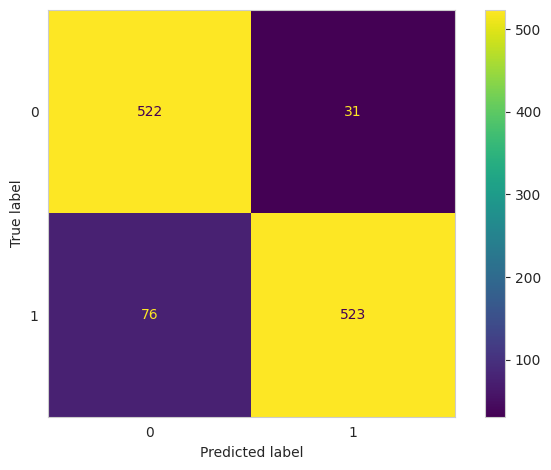

In [185]:
# Create classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,test_pred))

# this line removes the grid from the confusion matrix
sns.set_style("whitegrid", {'axes.grid' : False})

# Generate predictions
ConfusionMatrixDisplay.from_predictions(y_test,test_pred)
plt.show()

# Generate confusion matrix
from sklearn.metrics import confusion_matrix
cm1=confusion_matrix(y_test,test_pred)

In [186]:
# Visualizing evaluation Metric Score chart

# Random Foest evaluation
rf_model = model_evaluation('Random Foest',model2,X_train_scaled,y_train,X_test_scaled,y_test)

#add results to comparison df
add_list_to_final_df(rf_model)

#comparison df
comparison_df

Accuracy for the validation set is 0.9071180555555556
Recall for the validation set is 0.944043321299639
Precision for the validation set is 0.8731218697829716
F1 Score for the validation set is 0.9071986123156982


,Model_Name,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,Logistic Regression,0.660660,0.652100,0.674123,0.662929,0.648438,0.662752,0.659432,0.661088
1,Tuned Logistic Regression,0.653713,0.611673,0.822807,0.701702,0.668403,0.635456,0.849750,0.727143
2,Random Foest,1.000000,1.000000,1.000000,1.000000,0.907118,0.944043,0.873122,0.907199


#### 2. Cross- Validation & Hyperparameter Tuning

In [187]:
# ML Model - 2 Tuned Random Forest

# Instantiate classifier
RF = RandomForestClassifier(random_state=0)

# set parameter criteria
param_grid_RF = {
    'n_estimators' : [200],
    'max_depth' : [100], 
    'min_samples_split' : [5, 8], 
    'min_samples_leaf' : [3],
    'class_weight' : [{1 : 1.5}, {1 : 1.7}]
}
# Instantiate Grid Search
RS_RF = RandomizedSearchCV(RF, param_grid_RF, n_iter= 20, scoring= 'recall', 
                           random_state= 0)

# fit model
RS_RF.fit(X_train_scaled, y_train)

# Get the predicted probabilities
train_pred = RS_RF.predict(X_train_scaled)
test_pred = RS_RF.predict(X_test_scaled)

In [188]:
RS_RF.best_params_

{'n_estimators': 200,
 'min_samples_split': 8,
 'min_samples_leaf': 3,
 'max_depth': 100,
 'class_weight': {1: 1.7}}

              precision    recall  f1-score   support

           0       0.88      0.87      0.88       553
           1       0.88      0.89      0.89       599

    accuracy                           0.88      1152
   macro avg       0.88      0.88      0.88      1152
weighted avg       0.88      0.88      0.88      1152



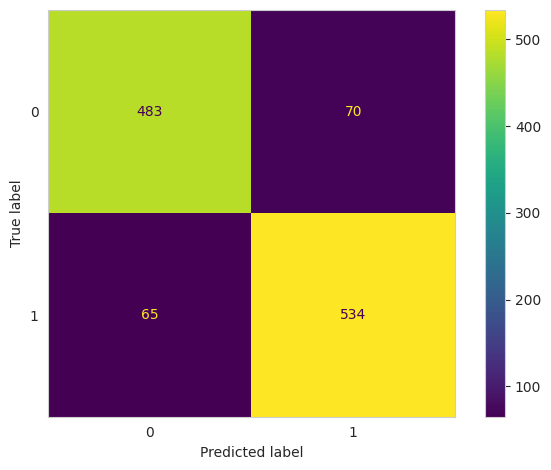

In [189]:
# Create classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,test_pred))

# this line removes the grid from the confusion matrix
sns.set_style("whitegrid", {'axes.grid' : False})

# Generate predictions
ConfusionMatrixDisplay.from_predictions(y_test,test_pred)
plt.show()

# Generate confusion matrix
from sklearn.metrics import confusion_matrix
cm1=confusion_matrix(y_test,test_pred)

##### Which hyperparameter optimization technique have you used and why?

- We are using a **random search** for XGBoost hyperparameter tuning. Since random search randomly picks a fixed number of hyperparameter combinations, we can afford to try more hyperparameters and more values.
- Also Grid search is an exhaustive hyperparameter search method. It trains models for every combination of specified hyperparameter values. Therefore, it can take a long time to run if we test out more hyperparameters and values.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [190]:
# Visualizing evaluation Metric Score chart

#save the best parameters
random_RF = RS_RF.best_estimator_

# Random Forest evaluation
random_forest_tune = model_evaluation('Tuned Random Forest',random_RF,X_train_scaled,y_train,X_test_scaled,y_test)

#add results to comparison df
add_list_to_final_df(random_forest_tune)

#comparison df
comparison_df

Accuracy for the validation set is 0.8828125
Recall for the validation set is 0.8841059602649006
Precision for the validation set is 0.8914858096828047
F1 Score for the validation set is 0.8877805486284289


,Model_Name,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,Logistic Regression,0.660660,0.652100,0.674123,0.662929,0.648438,0.662752,0.659432,0.661088
1,Tuned Logistic Regression,0.653713,0.611673,0.822807,0.701702,0.668403,0.635456,0.849750,0.727143
2,Random Foest,1.000000,1.000000,1.000000,1.000000,0.907118,0.944043,0.873122,0.907199
3,Tuned Random Forest,0.988493,0.989451,0.987281,0.988364,0.882812,0.884106,0.891486,0.887781


Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact of the ML model used.

We have used these 4 mertics to evaluate our model.Lets understand them a bit before trying to analyze their impact on business.
- **Accuracy** -  Accuracy tells you how many times the ML model was correct overall.
- **Recall** - Recall tells you how many times the model was able to detect a specific category
- **Precision** - Precision is how good the model is at predicting a specific category
- **F1 Score** - Its a evaluation metric that measures a model's accuracy. It combines the precision and recall scores of a model

Business Impact - 
- Tuned random forest model is able to predict False Negative around 88% of the time.
- But since in our case precison is also playing important role,so if we see overall F1 score we are getting correct predictions around 87% of the time

### ML Model - 3 - XG Boost Classification

XGBoost is an optimized distributed gradient boosting library designed for efficient and scalable training of machine learning models. It is an ensemble learning method that combines the predictions of multiple weak models to produce a stronger prediction

In [191]:
# ML Model -3 XG Boost

#Importing library
from xgboost import XGBClassifier

# making an object for XG Boost
xgb = XGBClassifier(random_state=0)

# Fit the Algorithm
model3=xgb.fit(X_train_scaled,y_train)

# Get the predicted probabilities
train_pred = model3.predict(X_train_scaled)
test_pred = model3.predict(X_test_scaled)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

              precision    recall  f1-score   support

           0       0.84      0.94      0.89       553
           1       0.93      0.84      0.88       599

    accuracy                           0.89      1152
   macro avg       0.89      0.89      0.89      1152
weighted avg       0.89      0.89      0.89      1152



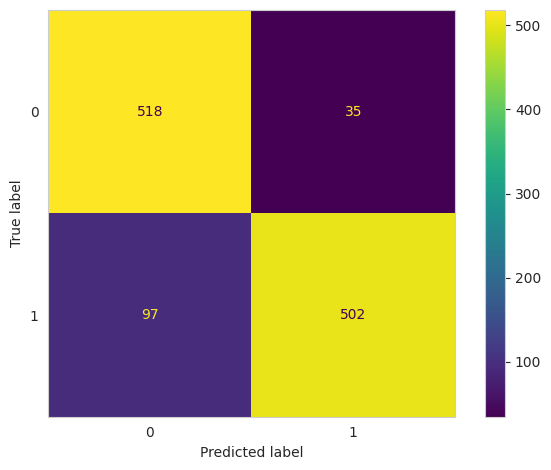

In [192]:
# Create classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,test_pred))

# this line removes the grid from the confusion matrix
sns.set_style("whitegrid", {'axes.grid' : False})

# Generate predictions
ConfusionMatrixDisplay.from_predictions(y_test,test_pred)
plt.show()

# Generate confusion matrix
from sklearn.metrics import confusion_matrix
cm1=confusion_matrix(y_test,test_pred)

In [193]:
# Visualizing evaluation Metric Score chart

# XG Boost evaluation
xgb_model = model_evaluation('XG Boost',model3,X_train_scaled,y_train,X_test_scaled,y_test)

#add results to comparison df
add_list_to_final_df(xgb_model)

#comparison df
comparison_df

Accuracy for the validation set is 0.8854166666666666
Recall for the validation set is 0.9348230912476723
Precision for the validation set is 0.8380634390651085
F1 Score for the validation set is 0.8838028169014084


,Model_Name,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,Logistic Regression,0.660660,0.652100,0.674123,0.662929,0.648438,0.662752,0.659432,0.661088
1,Tuned Logistic Regression,0.653713,0.611673,0.822807,0.701702,0.668403,0.635456,0.849750,0.727143
2,Random Foest,1.000000,1.000000,1.000000,1.000000,0.907118,0.944043,0.873122,0.907199
3,Tuned Random Forest,0.988493,0.989451,0.987281,0.988364,0.882812,0.884106,0.891486,0.887781
4,XG Boost,0.992184,0.999555,0.984649,0.992046,0.885417,0.934823,0.838063,0.883803


#### 2. Cross- Validation & Hyperparameter Tuning

In [194]:
# Hyperparameter tuning

# Instantiate classifier
xgb = XGBClassifier()

# Define the search space

param_grid_xgb = {
    'learning_rate': [0.08],
    'max_depth': [4],
    'min_child_weight': [2, 3],
    'n_estimaters' : [125, 150],
    'scale_pos_weight' : [1.5, 1.7]
}

In [195]:
# Define random search
RS_xgb = RandomizedSearchCV(xgb, param_grid_xgb, n_jobs= 3, scoring= 'recall', 
                            random_state=0)
# Fit grid search
RS_xgb.fit(X_train_scaled, y_train)
# Print grid search summary
# Get the predicted probabilities
train_pred = RS_xgb.predict(X_train_scaled)
test_pred = RS_xgb.predict(X_test_scaled)

[16:32:10] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimaters" } are not used.



In [196]:
RS_xgb.best_params_

{'scale_pos_weight': 1.7,
 'n_estimaters': 125,
 'min_child_weight': 2,
 'max_depth': 4,
 'learning_rate': 0.08}

              precision    recall  f1-score   support

           0       0.86      0.82      0.84       553
           1       0.84      0.88      0.86       599

    accuracy                           0.85      1152
   macro avg       0.85      0.85      0.85      1152
weighted avg       0.85      0.85      0.85      1152



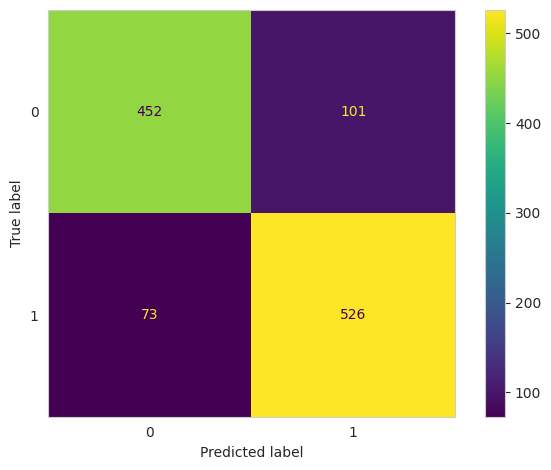

In [197]:
# Create classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,test_pred))

# this line removes the grid from the confusion matrix
sns.set_style("whitegrid", {'axes.grid' : False})

# Generate predictions
ConfusionMatrixDisplay.from_predictions(y_test,test_pred)
plt.show()

# Generate confusion matrix
from sklearn.metrics import confusion_matrix
cm1=confusion_matrix(y_test,test_pred)

##### Which hyperparameter optimization technique have you used and why?

- We are using a **random search** for XGBoost hyperparameter tuning. Since random search randomly picks a fixed number of hyperparameter combinations, we can afford to try more hyperparameters and more values.
- Also Grid search is an exhaustive hyperparameter search method. It trains models for every combination of specified hyperparameter values. Therefore, it can take a long time to run if we test out more hyperparameters and values.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [198]:
# Visualizing evaluation Metric Score chart

#save the best parameters
random_xgb = RS_xgb.best_estimator_

# XG Boost evaluation
random_xgb = model_evaluation('Tuned XG Boost',random_xgb,X_train_scaled,y_train,X_test_scaled,y_test)

#add results to comparison df
add_list_to_final_df(random_xgb)

#comparison df
comparison_df

Accuracy for the validation set is 0.8489583333333334
Recall for the validation set is 0.8389154704944178
Precision for the validation set is 0.8781302170283807
F1 Score for the validation set is 0.8580750407830344


,Model_Name,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,Logistic Regression,0.660660,0.652100,0.674123,0.662929,0.648438,0.662752,0.659432,0.661088
1,Tuned Logistic Regression,0.653713,0.611673,0.822807,0.701702,0.668403,0.635456,0.849750,0.727143
2,Random Foest,1.000000,1.000000,1.000000,1.000000,0.907118,0.944043,0.873122,0.907199
3,Tuned Random Forest,0.988493,0.989451,0.987281,0.988364,0.882812,0.884106,0.891486,0.887781
4,XG Boost,0.992184,0.999555,0.984649,0.992046,0.885417,0.934823,0.838063,0.883803
5,Tuned XG Boost,0.874077,0.848646,0.907456,0.877067,0.848958,0.838915,0.878130,0.858075


In [203]:
#test recall values
baseline_logistic_regression = 0.662752
XG_Boost = 0.838915	

#improvement % 
improvement_recall = ((XG_Boost - baseline_logistic_regression)/baseline_logistic_regression)*100
print('Model Performance')
print(f'Improvement of {round(improvement_recall,3)} % was seen in recall value of Tuned XG Boost against tuned logistic Regression.')

#test F1 values
baseline_logistic_regression = 0.661088
XG_Boost = 0.858075

#improvement % 
improvement_F1 = ((XG_Boost - baseline_logistic_regression)/baseline_logistic_regression)*100
print('Model Performance')
print(f'Improvement of {round(improvement_F1,3)} % was seen in F1 value of Tuned XG Boost against tuned logistic Regression.')

Model Performance
Improvement of 26.581 % was seen in recall value of Tuned XG Boost against tuned logistic Regression.
Model Performance
Improvement of 29.797 % was seen in F1 value of Tuned XG Boost against tuned logistic Regression.


### 1. Which Evaluation metrics did you consider for a positive business impact and why?

**Evaluation metrics:**
- Since the data we are dealing with is unbalanced classes, accuracy may not be the best evaluation metric to evaluate the model performance.
- We are also dealing with data related to healthcare, False Negatives are of higher concern than False Positive.
- But it does not mean that we can ignore False Positives,because it may lead to meantal and financial exhaustion of the customer.
- Considering these points in mind, we will rely upon **F1 Score** as the model evaluation metric.
- F1 score is a machine learning evaluation metric that measures a model's accuracy. It combines the precision and recall scores of a model. The accuracy metric computes how many times a model made a correct prediction across the entire dataset.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

- Initially the model that performed the best overall was random forest with tuned hyperparameters,but we noticed overfitting in it as huge difference between train and test values.

- Model that performed best with reduced overfitting was **Tuned XG Boost model**.
- We used Tuned XG Boost model due to it's highest false negative and true positive rates, which gave highest F1 score and least data overfitting.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

- **Extreme Gradient Boosting**
  - Gradient boosting refers to a class of ensemble machine learning algorithms that can be used for classification or regression predictive modeling problems.

  - Ensembles are constructed from decision tree models. Trees are added one at a time to the ensemble and fit to correct the prediction errors made by prior models. This is a type of ensemble machine learning model referred to as boosting.

  - Models are fit using any arbitrary differentiable loss function and gradient descent optimization algorithm. This gives the technique its name, “gradient boosting,” as the loss gradient is minimized as the model is fit, much like a neural network.

  Hyperparameters used to train Extreme Gradient Boosting - 
  - scale_pos_weight - A value greater than 0 should be used in case of high-class imbalance as it helps in faster convergence.
  - n_estimaters - specifies the number of decision trees to be boosted
  - min_child_weight - Defines the minimum sum of weights of all observations required in a child.Used to control over-fitting. Higher values prevent a model from learning relations that might be highly specific to the particular sample selected for a tree.
  - max_depth - Used to control over-fitting as higher depth will allow the model to learn relations very specific to a particular sample.
  - learning_rate - It determines the step size at each iteration while moving toward a minimum of a loss function.

<Axes: title={'center': 'Feature Importances: XG Boost'}, xlabel='Relative Importance'>

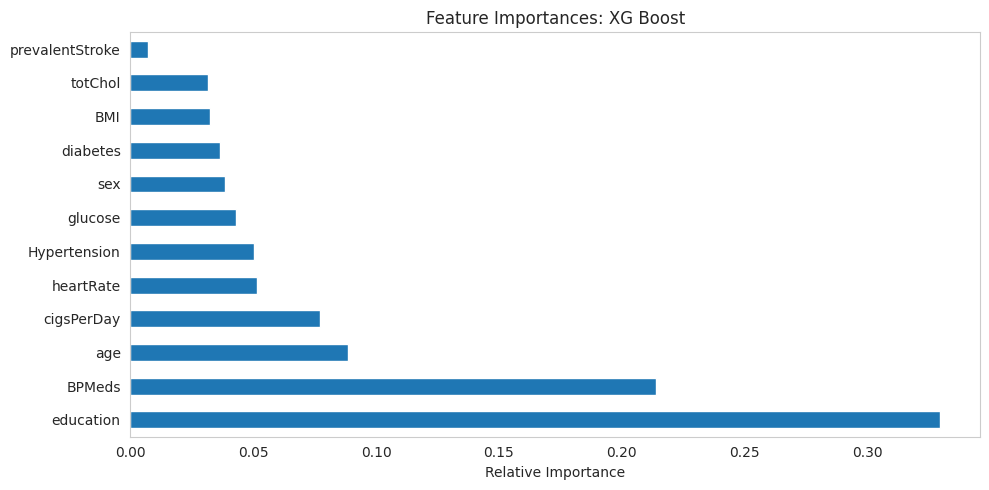

In [200]:
# Feature importances

feature_imp = pd.Series(model3.feature_importances_, index=X.columns)
plt.figure(figsize=(10,5))
plt.title('Feature Importances: XG Boost')
plt.xlabel('Relative Importance')
feature_imp.nlargest(20).plot(kind='barh')
     

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [201]:
# Save the File
import pickle

filename = '/content/drive/MyDrive/Almabetter/Capstone Projects/Capstone 3/final_model'
pickle.dump(random_xgb,open(filename,'wb'))

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [202]:
# Load the File and predict unseen data.


### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

**Health forecasting** is a novel area of forecasting, and a valuable tool for predicting future health events or situations such as demands for health services and healthcare needs. It facilitates preventive medicine and health care intervention strategies, by pre-informing health service providers to take appropriate mitigating actions to minimize risks and manage demand

- If we want to completely avoid any
situations where the patient has
heart disease, a high recall is desired.
Whereas if we want to avoid treating
a patient with no heart diseases a
high precision is desired.
- Assuming that in our case the
patients who were incorrectly
classified as suffering from heart
disease are equally important since
they could be indicative of some
other ailment, so we want a balance
between precision and recall and a
high f1 score is desired.
- Since we have added synthetic data
points to handle the huge class
imbalance in the training set, the
data distribution in train and test are
different so the high performance of
models in the train set is due to the
train-test data distribution mismatch
and not due to overfitting.
- Best performance of Models on test
data based on evaluation metrics is XG Boost Classification model.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***